# Mengenalisis Interaction Network dari Data Twitter

### Persiapan Data

In [ ]:
pip install networkx==2.3

Note: you may need to restart the kernel to use updated packages.


**Proses install Library PyMysql**

In [ ]:
!pip install pymysql
!pip install mysql-connector-python-rf

**Melakukan import libraries**

In [ ]:
#Import modules
%matplotlib inline

#handling data
#import libraries
import pandas as pd
import numpy as np
import glob
import json
import random
import collections
import datetime
from operator import itemgetter
from networkx.readwrite import json_graph
from scipy import stats
from datetime import datetime

#handling information
import re

#handling plots
import matplotlib.pyplot as plt
import seaborn as sns

#for network creation
import networkx as nx

## Load Data dari File CSV

Deklarasi date_start dan date_end untuk masing-masing periode sebelum dan saat COVID-19 memetakan label setiap periodenya

In [ ]:
from datetime import date

date_start = date(2019,12,13)
date_end   = date(2020,6,13)

date_start_convert = date_start.strftime('%d%m%Y')
date_end_convert = date_end.strftime('%d%m%Y')

**Mengambil Data Tweets Pengguna**

Lakukan load data tweets beserta data username penggunanya dari file CSV

In [ ]:
#deklarasi tanggal saat mulai covid-19
date_time_str = '2020-03-14 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')

#read file CSV
tweets_df = pd.read_csv('../data/interractions/all/tweets_data_after_joining_{}-{}.csv'.format(date_start_convert, date_end_convert))

#merubah format kolom date_created ke format datetime
tweets_df['date_created'] = pd.to_datetime(tweets_df["date_created"], infer_datetime_format=True)
tweets_df['date_created'] = pd.to_datetime(tweets_df["date_created"], format="%Y-%m-%d")

#seleksi data pada saat covid (14 maret 2020 dst)
tweets_df = tweets_df[tweets_df['date_created'] >= date_time_obj]

#save data ke file CSV
tweets_df.to_csv('../data/interractions/covid/tweets_data_after_joining_{}-{}.csv'.format(date_start_convert, date_end_convert))

/Users/toniafriantoni/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,22,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#read file CSV
tweets_df = pd.read_csv('../data/interractions/covid/tweets_data_after_joining_{}-{}.csv'.format(date_start_convert, date_end_convert))

**Mengambil Data Retweet Pengguna**

Lakukan load data retweets dari file CSV

In [ ]:
#deklarasi tanggal saat mulai covid-19
date_time_str = '2020-03-14 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')

#read file CSV
retweets_df = pd.read_csv('../data/interractions/all/retweets_data_after_joining_{}-{}.csv'.format(date_start_convert, date_end_convert))

#merubah format kolom date_created ke format datetime
retweets_df['date_created'] = pd.to_datetime(retweets_df["date_created"], infer_datetime_format=True)
retweets_df['date_created'] = pd.to_datetime(retweets_df["date_created"], format="%Y-%m-%d")

#seleksi data pada saat covid (14 maret 2020 dst)
retweets_df = retweets_df[retweets_df['date_created'] >= date_time_obj]

#save data ke file CSV
retweets_df.to_csv('../data/interractions/covid/retweets_data_after_joining_{}-{}.csv'.format(date_start_convert, date_end_convert))

In [ ]:
#read file CSV
retweets_df = pd.read_csv('../data/interractions/covid/retweets_data_after_joining_{}-{}.csv'.format(date_start_convert, date_end_convert))

**Mengambil Data Mentions Pengguna**

Lakukan load data mentions dari file CSV

In [ ]:
#deklarasi tanggal saat mulai covid-19
date_time_str = '2020-03-14 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')

#read file CSV
mentions_df = pd.read_csv('../data/interractions/all/mentions_data_after_joining_{}-{}.csv'.format(date_start_convert, date_end_convert))

#merubah format kolom date_created ke format datetime
mentions_df['date_created'] = pd.to_datetime(mentions_df["date_created"], infer_datetime_format=True)
mentions_df['date_created'] = pd.to_datetime(mentions_df["date_created"], format="%Y-%m-%d")

#seleksi data pada saat covid (14 maret 2020 dst)
mentions_df = mentions_df[mentions_df['date_created'] >= date_time_obj]

#save data ke file CSV
mentions_df.to_csv('../data/interractions/covid/mentions_data_after_joining_{}-{}.csv'.format(date_start_convert, date_end_convert))

/Users/toniafriantoni/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#read file CSV
mentions_df = pd.read_csv('../data/interractions/covid/mentions_data_after_joining_{}-{}.csv'.format(date_start_convert, date_end_convert))

**Mengambil Data Reply_to Pengguna**

Lakukan load data reply_to dari file CSV

In [ ]:
#deklarasi tanggal saat mulai covid-19
date_time_str = '2020-03-14 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')

#read file CSV
replyto_df = pd.read_csv('../data/interractions/all/replyto_data_after_joining_{}-{}.csv'.format(date_start_convert, date_end_convert))

#merubah format kolom date_created ke format datetime
replyto_df['date_created'] = pd.to_datetime(replyto_df["date_created"], infer_datetime_format=True, dayfirst=True, errors='coerce')
replyto_df['date_created'] = pd.to_datetime(replyto_df["date_created"], format="%Y-%m-%d", dayfirst=True, errors='coerce')

#seleksi data pada saat covid (14 maret 2020 dst)
replyto_df = replyto_df[replyto_df['date_created'] != '[]']
replyto_df = replyto_df[replyto_df['date_created'] >= date_time_obj]

#save data ke file CSV
replyto_df.to_csv('../data/interractions/covid/replyto_data_after_joining_{}-{}.csv'.format(date_start_convert, date_end_convert))

In [ ]:
#read file CSV
replyto_df = pd.read_csv('../data/interractions/covid/replyto_data_after_joining_{}-{}.csv'.format(date_start_convert, date_end_convert))

**Mengambil Data Informasi Pengguna**

Lakukan load data informasi pengguna dari file CSV

In [ ]:
#read file CSV
users_df = pd.read_csv('../data/interractions/all/users_data_after_joining_{}-{}.csv'.format(date_start_convert, date_end_convert))

#read file CSV
users_df.to_csv('../data/interractions/covid/users_data_after_joining_{}-{}.csv'.format(date_start_convert, date_end_convert))

In [ ]:
#read file CSV
users_df = pd.read_csv('../data/interractions/covid/users_data_after_joining_{}-{}.csv'.format(date_start_convert, date_end_convert))

## Membuat Tabel Data Interaksi Pengguna

**Tabel Data Interaksi Mentions Pengguna**

Membuat file CSV untuk menyimpan data interaksi mentions dari pengguna

In [ ]:
users_df_array = ['username']
for j, user in users_df.iterrows():
    users_df_array.append(user['username'])

user_data_df = pd.DataFrame(users_df_array)
user_data_df.T.to_csv('../data/interractions/covid/mentions_interractions_data_{}-{}.csv'.format(date_start_convert, date_end_convert), index=False, header=False)

Menghitung jumlah interaksi mentions dari masing-masing pengguna lalu menyimpannya ke file CSV yang berisi interaksi mentions dari pengguna sebelumnya

In [ ]:
for i, user in users_df.iterrows():
    data = []
    data.append(user['username'])
    for j, mentions in users_df.iterrows():
        mentions_data_temp = mentions_df.loc[(mentions_df['user_id'] == user['user_id']) & (mentions_df['user_mentions_id'] == mentions['user_id']),['user_id']].count()
        data.append(mentions_data_temp['user_id'])
    final_mentions = pd.DataFrame(data)
    final_mentions.T.to_csv('../data/interractions/covid/mentions_interractions_data_{}-{}.csv'.format(date_start_convert, date_end_convert), mode='a', index=False, header=False)

Membaca file CSV dari data interaksi mentions pengguna

In [ ]:
final_mentions = pd.read_csv('../data/interractions/covid/mentions_interractions_data_{}-{}.csv'.format(date_start_convert, date_end_convert))

Membuat kolom username menjadi index dataframe

In [ ]:
final_mentions.set_index('username', inplace = True)

**Tabel Data Interaksi Retweets Pengguna**

Membuat file CSV untuk menyimpan data interaksi retweets dari pengguna

In [ ]:
users_df_array = ['username']
for j, user in users_df.iterrows():
    users_df_array.append(user['username'])

user_data_df = pd.DataFrame(users_df_array)
user_data_df.T.to_csv('../data/interractions/covid/retweets_interractions_data_{}-{}.csv'.format(date_start_convert, date_end_convert), index=False, header=False)

Menghitung jumlah interaksi mentions dari masing-masing pengguna lalu menyimpannya ke file CSV yang berisi interaksi mentions dari pengguna sebelumnya

In [ ]:
for i, user in users_df.iterrows():
    data = []
    data.append(user['username'])
    for j, retweets in users_df.iterrows():
        retweets_data_temp = retweets_df.loc[(retweets_df['user_id'] == user['user_id']) & (retweets_df['user_retweet_id'] == retweets['user_id']),['user_id']].count()
        data.append(retweets_data_temp['user_id'])
    final_retweets = pd.DataFrame(data)
    final_retweets.T.to_csv('../data/interractions/covid/retweets_interractions_data_{}-{}.csv'.format(date_start_convert, date_end_convert), mode='a', index=False, header=False)

Membaca file CSV dari data interaksi retweets pengguna

In [ ]:
final_retweets = pd.read_csv('../data/interractions/covid/retweets_interractions_data_{}-{}.csv'.format(date_start_convert, date_end_convert))

Membuat kolom username menjadi index dataframe

In [ ]:
final_retweets.set_index('username', inplace = True)

**Tabel Data Interaksi Reply_to Pengguna**

Membuat file CSV untuk menyimpan data interaksi reply_to dari pengguna

In [ ]:
users_df_array = ['username']
for j, user in users_df.iterrows():
    users_df_array.append(user['username'])

user_data_df = pd.DataFrame(users_df_array)
user_data_df.T.to_csv('../data/interractions/covid/replyto_interractions_data_{}-{}.csv'.format(date_start_convert, date_end_convert), index=False, header=False)

Menghitung jumlah interaksi mentions dari masing-masing pengguna lalu menyimpannya ke file CSV yang berisi interaksi mentions dari pengguna sebelumnya

In [ ]:
for i, user in users_df.iterrows():
    data = []
    data.append(user['username'])
    for j, replyto in users_df.iterrows():
        replyto_data_temp = replyto_df.loc[(replyto_df['user_id'] == user['user_id']) & (replyto_df['in_reply_to_user_id'] == replyto['user_id']),['user_id']].count()
        data.append(replyto_data_temp['user_id'])
    final_replyto = pd.DataFrame(data)
    final_replyto.T.to_csv('../data/interractions/covid/replyto_interractions_data_{}-{}.csv'.format(date_start_convert, date_end_convert), mode='a', index=False, header=False)

Membaca file CSV dari data interaksi reply_to pengguna

In [ ]:
final_replyto = pd.read_csv('../data/interractions/covid/replyto_interractions_data_{}-{}.csv'.format(date_start_convert, date_end_convert))

Membuat kolom username menjadi index dataframe

In [ ]:
final_replyto.set_index('username', inplace = True)

**Tabel Data Informasi Jumlah Postingan Perminggu**

Membuat file CSV untuk menyimpan data jumlah postingan setiap minggu dari pengguna

In [ ]:
week = ['minggu1', 'minggu2', 'minggu3', 'minggu4', 'minggu5', 'minggu6', 'minggu7', 'minggu8', 'minggu9', 'minggu10',
        'minggu11', 'minggu12', 'minggu13', 'minggu14', 'minggu15', 'minggu16', 'minggu17', 'minggu18', 'minggu19', 'minggu20',
        'minggu21', 'minggu22', 'minggu23', 'minggu24', 'minggu25', 'minggu26', 'minggu27'
        ]
week_df = pd.DataFrame(week, columns=['week'])

week_df_array = ['username']
for j, week in week_df.iterrows():
    week_df_array.append(week['week'])

week_data_df = pd.DataFrame(week_df_array)
week_data_df.T.to_csv('../data/interractions/covid/week_tweets_data_{}-{}.csv'.format(date_start_convert, date_end_convert), index=False, header=False)

Function untuk membuat pembagian dari start_date dan end_date ke data mingguan (per-7 hari)

In [ ]:
import datetime
import pandas as pd

df = pd.DataFrame([["2019-12-13", "2020-06-13"]],
columns = ["start_date", "end_date"])

# Convert dtaframe to dates
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

df_out = pd.DataFrame()
week = 7

# Iterate over dataframe rows
for index, row in df.iterrows():
    date = row["start_date"]
    date_end = row["end_date"]
    # Get the weeks for the row
    while date < date_end:
        date_next = date + datetime.timedelta(week - 1)
        df_out = df_out.append([[ date, date_next]])
        date = date_next + datetime.timedelta(1)

# Remove extra index and assign columns as original dataframe
df_out = df_out.reset_index(drop=True)
df_out.columns = df.columns
df_out

start_date   end_date
0  2019-12-13 2019-12-19
1  2019-12-20 2019-12-26
2  2019-12-27 2020-01-02
3  2020-01-03 2020-01-09
4  2020-01-10 2020-01-16
5  2020-01-17 2020-01-23
6  2020-01-24 2020-01-30
7  2020-01-31 2020-02-06
8  2020-02-07 2020-02-13
9  2020-02-14 2020-02-20
10 2020-02-21 2020-02-27
11 2020-02-28 2020-03-05
12 2020-03-06 2020-03-12
13 2020-03-13 2020-03-19
14 2020-03-20 2020-03-26
15 2020-03-27 2020-04-02
16 2020-04-03 2020-04-09
17 2020-04-10 2020-04-16
18 2020-04-17 2020-04-23
19 2020-04-24 2020-04-30
20 2020-05-01 2020-05-07
21 2020-05-08 2020-05-14
22 2020-05-15 2020-05-21
23 2020-05-22 2020-05-28
24 2020-05-29 2020-06-04
25 2020-06-05 2020-06-11
26 2020-06-12 2020-06-18

Mengubah format kolom date_created dari string ke datetime

In [ ]:
tweets_df['date_created'] = pd.to_datetime(tweets_df['date_created'])

Menghitung jumlah postingan perminggu dari masing-masing pengguna lalu menyimpannya ke file CSV yang berisi jumlah postingan perminggu dari masing-masing pengguna sebelumnya

In [ ]:
for i, user in users_df.iterrows():
    data = []
    data.append(user['username'])
    for j, week in df_out.iterrows():
        week_tweets_data_temp = tweets_df.loc[(tweets_df['user_id'] == user['user_id']) & (tweets_df['date_created'] >= week['start_date']) & (tweets_df['date_created'] < week['end_date']),['user_id']].count()
        data.append(round(week_tweets_data_temp['user_id'], 0))
    final_week_tweets = pd.DataFrame(data)
    final_week_tweets.T.to_csv('../data/interractions/covid/week_tweets_data_{}-{}.csv'.format(date_start_convert, date_end_convert), mode='a', index=False, header=False)

Membaca file CSV dari data jumlah postingan perminggu dari setiap pengguna

In [ ]:
final_week_tweets = pd.read_csv('../data/interractions/covid/week_tweets_data_{}-{}.csv'.format(date_start_convert, date_end_convert))

Membuat kolom username menjadi index dataframe

In [ ]:
final_week_tweets.set_index('username', inplace = True)

**Tabel Data Informasi Jumlah Postingan Perbulan**

Membuat file CSV untuk menyimpan data jumlah postingan setiap bulan dari pengguna

In [ ]:
month = ['bulan1', 'bulan2', 'bulan3', 'bulan4', 'bulan5', 'bulan6', 'bulan7']
month_df = pd.DataFrame(month, columns=['month'])

month_df_array = ['username']
for j, month in month_df.iterrows():
    month_df_array.append(month['month'])

month_data_df = pd.DataFrame(month_df_array)
month_data_df.T.to_csv('../data/interractions/covid/month_tweets_data_{}-{}.csv'.format(date_start_convert, date_end_convert), index=False, header=False)

Function untuk membuat pembagian dari start_date dan end_date ke data mingguan (per-7 hari)

In [ ]:
import datetime
import pandas as pd

df = pd.DataFrame([["2019-12-13", "2020-06-13"]],
columns = ["start_date", "end_date"])

# Convert dtaframe to dates
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

df_out = pd.DataFrame()
week = 30

# Iterate over dataframe rows
for index, row in df.iterrows():
    date = row["start_date"]
    date_end = row["end_date"]
    # Get the weeks for the row
    while date < date_end:
        date_next = date + datetime.timedelta(week - 1)
        df_out = df_out.append([[ date, date_next]])
        date = date_next + datetime.timedelta(1)

# Remove extra index and assign columns as original dataframe
df_out = df_out.reset_index(drop=True)
df_out.columns = df.columns
df_out

start_date   end_date
0 2019-12-13 2020-01-11
1 2020-01-12 2020-02-10
2 2020-02-11 2020-03-11
3 2020-03-12 2020-04-10
4 2020-04-11 2020-05-10
5 2020-05-11 2020-06-09
6 2020-06-10 2020-07-09

Mengubah format kolom date_created dari string ke datetime

In [ ]:
tweets_df['date_created'] = pd.to_datetime(tweets_df['date_created'])

Menghitung jumlah postingan perminggu dari masing-masing pengguna lalu menyimpannya ke file CSV yang berisi jumlah postingan perminggu dari masing-masing pengguna sebelumnya

In [ ]:
for i, user in users_df.iterrows():
    data = []
    data.append(user['username'])
    for j, month in df_out.iterrows():
        month_tweets_data_temp = tweets_df.loc[(tweets_df['user_id'] == user['user_id']) & (tweets_df['date_created'] >= month['start_date']) & (tweets_df['date_created'] < month['end_date']),['user_id']].count()
        data.append(month_tweets_data_temp['user_id'])
    final_month_tweets = pd.DataFrame(data)
    final_month_tweets.T.to_csv('../data/interractions/covid/month_tweets_data_{}-{}.csv'.format(date_start_convert, date_end_convert), mode='a', index=False, header=False)

Membaca file CSV dari data jumlah postingan perbulan dari setiap pengguna

In [ ]:
final_month_tweets = pd.read_csv('../data/interractions/covid/month_tweets_data_{}-{}.csv'.format(date_start_convert, date_end_convert))

Membuat kolom username menjadi index dataframe

In [ ]:
final_month_tweets.set_index('username', inplace = True)

## Membuat Graph dari Tabel Data Interaksi

**Keseluruhan Graph Interaksi dari Pengguna**

Membuat fungsi diskritisasi untuk mengecilkan nilai edges

In [ ]:
def discretization_weight(edge_weight):
    size = []
    
    for i in edge_weight:
        if i > 10 and i < 25:
            size.append(1)
        elif i > 25 and i < 50:
            size.append(2)
        elif i > 50 and i < 75:
            size.append(3)
        elif i > 75 and i < 100:
            size.append(4)
        elif i > 100 and i < 150:
            size.append(5)
        elif i > 150 and i < 200:
            size.append(6)
        elif i > 200 and i < 250:
            size.append(7)
        elif i > 250 and i < 500:
            size.append(8)
        elif i > 500 and i < 1000:
            size.append(9)
        else:
            size.append(10)
    
    return size

Membuat graph untuk memetakan keseluruhan interaksi mentions pada pengguna

In [ ]:
import networkx as nx
graph_data = nx.Graph()

for i, user in users_df.iterrows():
    for j, mentions in users_df.iterrows():
        mentions_data = final_mentions.loc[[user['username']], [mentions['username']]]
        mentions_value = mentions_data[mentions['username']][0]
        #check jika kedua user punya interaksi mentions
        if mentions_value > 0:
            #check agar user tidak berinteraksi mentions dengan dirinya sendiri
            if user['username'] != mentions['username']:
                #check jika edge kedua user belum ada
                check_edge = graph_data.get_edge_data(user['username'], mentions['username'], default=0)
                if check_edge != 0:
                    #check apakah warna edge nya hitam
                    if graph_data[user['username']][mentions['username']]['color'] != 'green':
                            graph_data.add_node(user['username'], weight=mentions_value, color='#7FFFD4')
                            graph_data.add_node(mentions['username'], weight=mentions_value, color='#7FFFD4')
                            graph_data.add_edge(user['username'],mentions['username'], weight=mentions_value, color='green')
                else:
                    graph_data.add_node(user['username'], weight=mentions_value, color='#7FFFD4')
                    graph_data.add_node(mentions['username'], weight=mentions_value, color='#7FFFD4')
                    graph_data.add_edge(user['username'],mentions['username'], weight=mentions_value, color='green')

Membuat tambahan edge graph untuk memetakan interaksi retweet pada pengguna

In [ ]:
for i, user in users_df.iterrows():
    for j, retweets in users_df.iterrows():
        retweets_data = final_retweets.loc[[user['username']], [retweets['username']]]
        retweets_value = retweets_data[retweets['username']][0]
        #check jika kedua user punya interaksi mentions
        if retweets_value > 0:
            #check agar user tidak berinteraksi mentions dengan dirinya sendiri
            if user['username'] != retweets['username']:
                #check jika edge kedua user belum ada
                check_edge = graph_data.get_edge_data(user['username'], retweets['username'], default=0)
                if check_edge != 0:
                    #check apakah warna edge nya hitam
                    if graph_data[user['username']][retweets['username']]['color'] != 'blue' or graph_data[user['username']][retweets['username']]['color'] != 'green':
                            graph_data.add_node(user['username'], weight=retweets_value, color='#00BFFF')
                            graph_data.add_node(retweets['username'], weight=retweets_value, color='#00BFFF')
                            graph_data.add_edge(user['username'],retweets['username'], weight=retweets_value, color='blue')
                else:
                    graph_data.add_node(user['username'], weight=retweets_value, color='#00BFFF')
                    graph_data.add_node(retweets['username'], weight=retweets_value, color='#00BFFF')
                    graph_data.add_edge(user['username'],retweets['username'], weight=retweets_value, color='blue')

Membuat tambahan edge graph untuk memetakan interaksi reply_to pada pengguna

In [ ]:
for i, user in users_df.iterrows():
    for j, replyto in users_df.iterrows():
        replyto_data = final_replyto.loc[[user['username']], [replyto['username']]]
        replyto_value = replyto_data[replyto['username']][0]
        #check jika kedua user punya interaksi mentions
        if replyto_value > 0:
            #check agar user tidak berinteraksi mentions dengan dirinya sendiri
            if user['username'] != replyto['username']:
                #check jika edge kedua user belum ada
                check_edge = graph_data.get_edge_data(user['username'], replyto['username'], default=0)
                if check_edge != 0:
                    #check apakah warna edge nya hitam
                    if graph_data[user['username']][replyto['username']]['color'] != 'blue' or graph_data[user['username']][replyto['username']]['color'] != 'green' or graph_data[user['username']][replyto['username']]['color'] != 'red':
                            graph_data.add_node(user['username'], weight=replyto_value, color='#FF1493')
                            graph_data.add_node(replyto['username'], weight=replyto_value, color='#FF1493')
                            graph_data.add_edge(user['username'],replyto['username'], weight=replyto_value, color='red')
                else:
                    graph_data.add_node(user['username'], weight=replyto_value, color='#FF1493')
                    graph_data.add_node(replyto['username'], weight=replyto_value, color='#FF1493')
                    graph_data.add_edge(user['username'],replyto['username'], weight=replyto_value, color='red')

Menyalin nilai data graph

In [ ]:
all_graph = graph_data.copy()

Menyimpan data graph ke file graphml

In [ ]:
nx.write_graphml(all_graph, "../data/interractions/covid/all_graph_data_before_diferencing_{}-{}.graphml".format(date_start_convert, date_end_convert))  

membaca data file graph

In [ ]:
all_graph = nx.read_graphml("../data/interractions/covid/all_graph_data_before_diferencing_{}-{}.graphml".format(date_start_convert, date_end_convert))  

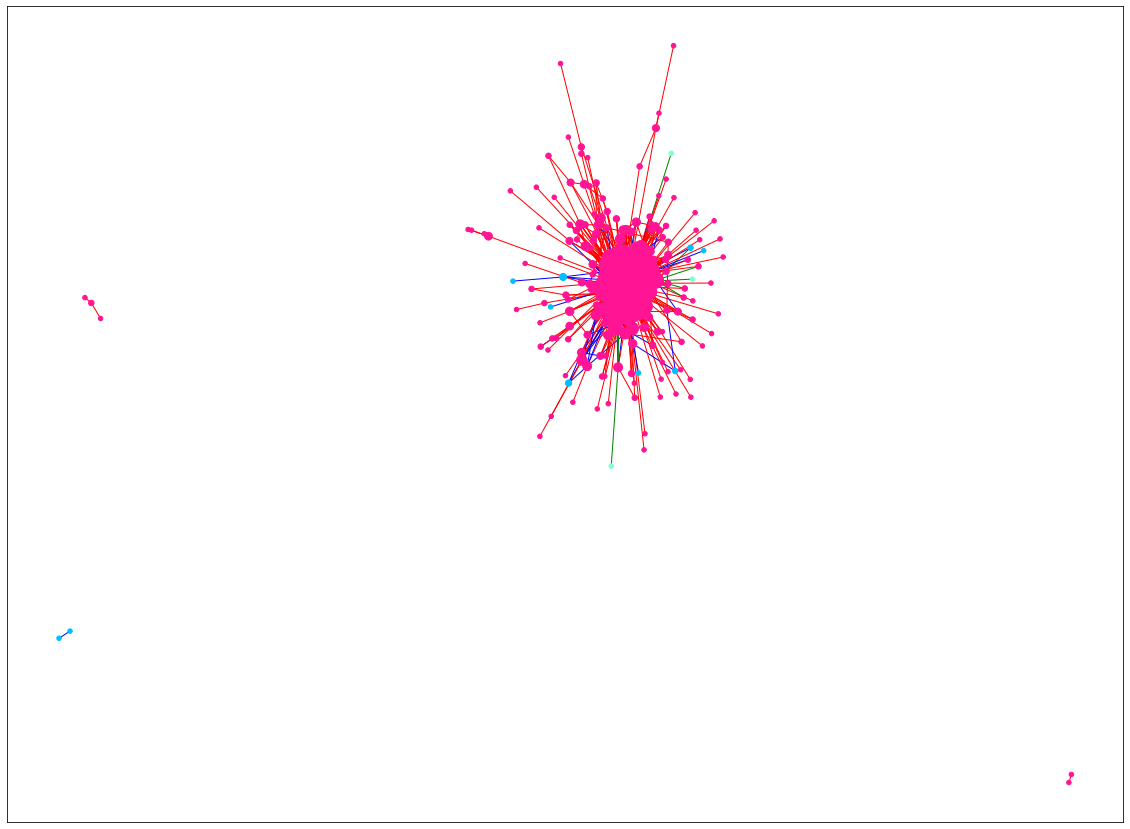

In [ ]:
plt.figure(figsize=(20,15))
pos = nx.spring_layout(all_graph)
degrees = nx.degree(all_graph)
node_color = [all_graph.node[node]['color'] for node in all_graph]
node_size = [(degrees[v] + 1) * 10.0 for v in all_graph.nodes()]
edge_color = [all_graph[u][v]['color'] for u,v in all_graph.edges()]
#edge_weight = [all_graph[u][v]['weight'] for u,v in all_graph.edges()]
#edge_discretization = discretization_weight(edge_weight)

nx.draw_networkx(all_graph, pos=pos, cmap=plt.cm.PiYG, node_color=node_color, node_size=node_size, edge_color=edge_color, with_labels=False)

**Keseluruhan Graph Interaksi dari Pengguna berdasarkan nilai Thresold 10**

Membuat graph untuk memetakan keseluruhan interaksi mentions pada pengguna

In [ ]:
import networkx as nx
graph_data = nx.Graph()

for i, user in users_df.iterrows():
    for j, mentions in users_df.iterrows():
        mentions_data = final_mentions.loc[[user['username']], [mentions['username']]]
        mentions_value = mentions_data[mentions['username']][0]
        #check jika kedua user punya interaksi mentions
        if mentions_value > 10:
            #check agar user tidak berinteraksi mentions dengan dirinya sendiri
            if user['username'] != mentions['username']:
                #check jika edge kedua user belum ada
                check_edge = graph_data.get_edge_data(user['username'], mentions['username'], default=0)
                if check_edge != 0:
                    #check apakah warna edge nya hitam
                    if graph_data[user['username']][mentions['username']]['color'] != 'green':
                            graph_data.add_node(user['username'], weight=mentions_value, color='#7FFFD4')
                            graph_data.add_node(mentions['username'], weight=mentions_value, color='#7FFFD4')
                            graph_data.add_edge(user['username'],mentions['username'], weight=mentions_value, color='green')
                else:
                    graph_data.add_node(user['username'], weight=mentions_value, color='#7FFFD4')
                    graph_data.add_node(mentions['username'], weight=mentions_value, color='#7FFFD4')
                    graph_data.add_edge(user['username'],mentions['username'], weight=mentions_value, color='green')

Menyalin nilai mentions graph

In [ ]:
mentions_graph_data = graph_data.copy()

Menyimpan data graph ke file graphml

In [ ]:
nx.write_graphml(mentions_graph_data, "../data/interractions/covid/mentions_graphml_{}-{}.graphml".format(date_start_convert, date_end_convert))  

membaca data file graph

In [ ]:
mentions_graph_data = nx.read_graphml("../data/interractions/covid/mentions_graphml_{}-{}.graphml".format(date_start_convert, date_end_convert))  

Menampikan graph dari aktivitas mentions

/Users/toniafriantoni/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/toniafriantoni/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


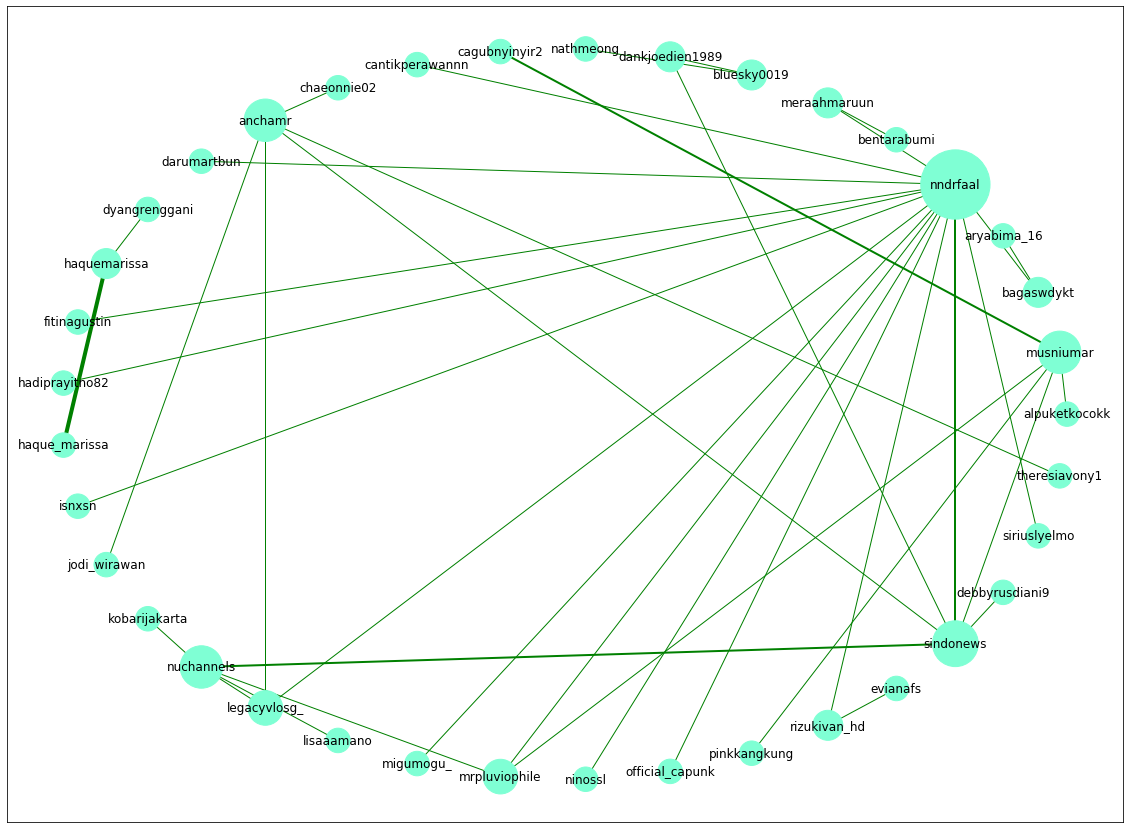

In [ ]:
plt.figure(figsize=(20,15))
pos = nx.circular_layout(mentions_graph_data)
degrees = nx.degree(mentions_graph_data)
node_color = [mentions_graph_data.node[node]['color'] for node in mentions_graph_data]
node_size = [(degrees[v] + 1) * 300.0 for v in mentions_graph_data.nodes()]
edge_color = [mentions_graph_data[u][v]['color'] for u,v in mentions_graph_data.edges()]
edge_weight = [mentions_graph_data[u][v]['weight'] for u,v in mentions_graph_data.edges()]
edge_discretization = discretization_weight(edge_weight)

nx.draw_networkx(mentions_graph_data, pos=pos, cmap=plt.cm.PiYG, node_color='#7FFFD4', node_size=node_size, edge_color=edge_color, width=edge_discretization)

Menampilkan 5 node dengan nilai degree terbesar

In [ ]:
sorted(mentions_graph_data.degree, key=lambda x: x[1], reverse=True)[:5]

[('nndrfaal', 15),
 ('sindonews', 6),
 ('musniumar', 5),
 ('anchamr', 5),
 ('nuchannels', 5)]

Menampilkan graph untuk memetakan interaksi retweet pada pengguna

In [ ]:
graph_data = nx.Graph()

for i, user in users_df.iterrows():
    for j, retweets in users_df.iterrows():
        retweets_data = final_retweets.loc[[user['username']], [retweets['username']]]
        retweets_value = retweets_data[retweets['username']][0]
        #check jika kedua user punya interaksi mentions
        if retweets_value > 10:
            #check agar user tidak berinteraksi mentions dengan dirinya sendiri
            if user['username'] != retweets['username']:
                #check jika edge kedua user belum ada
                check_edge = graph_data.get_edge_data(user['username'], retweets['username'], default=0)
                if check_edge != 0:
                    #check apakah warna edge nya hitam
                    if graph_data[user['username']][retweets['username']]['color'] != 'blue' or graph_data[user['username']][retweets['username']]['color'] != 'green':
                            graph_data.add_node(user['username'], weight=retweets_value, color='#00BFFF')
                            graph_data.add_node(retweets['username'], weight=retweets_value, color='#00BFFF')
                            graph_data.add_edge(user['username'],retweets['username'], weight=retweets_value, color='blue')
                else:
                    graph_data.add_node(user['username'], weight=retweets_value, color='#00BFFF')
                    graph_data.add_node(retweets['username'], weight=retweets_value, color='#00BFFF')
                    graph_data.add_edge(user['username'],retweets['username'], weight=retweets_value, color='blue')

Menyalin nilai retweets graph

In [ ]:
retweets_graph_data = graph_data.copy()

Menyimpan data ke file graphml

In [ ]:
nx.write_graphml(retweets_graph_data, "../data/interractions/covid/retweets_graphml_{}-{}.graphml".format(date_start_convert, date_end_convert))  

membaca data file graph

In [ ]:
retweets_graph_data = nx.read_graphml("../data/interractions/covid/retweets_graphml_{}-{}.graphml".format(date_start_convert, date_end_convert))  

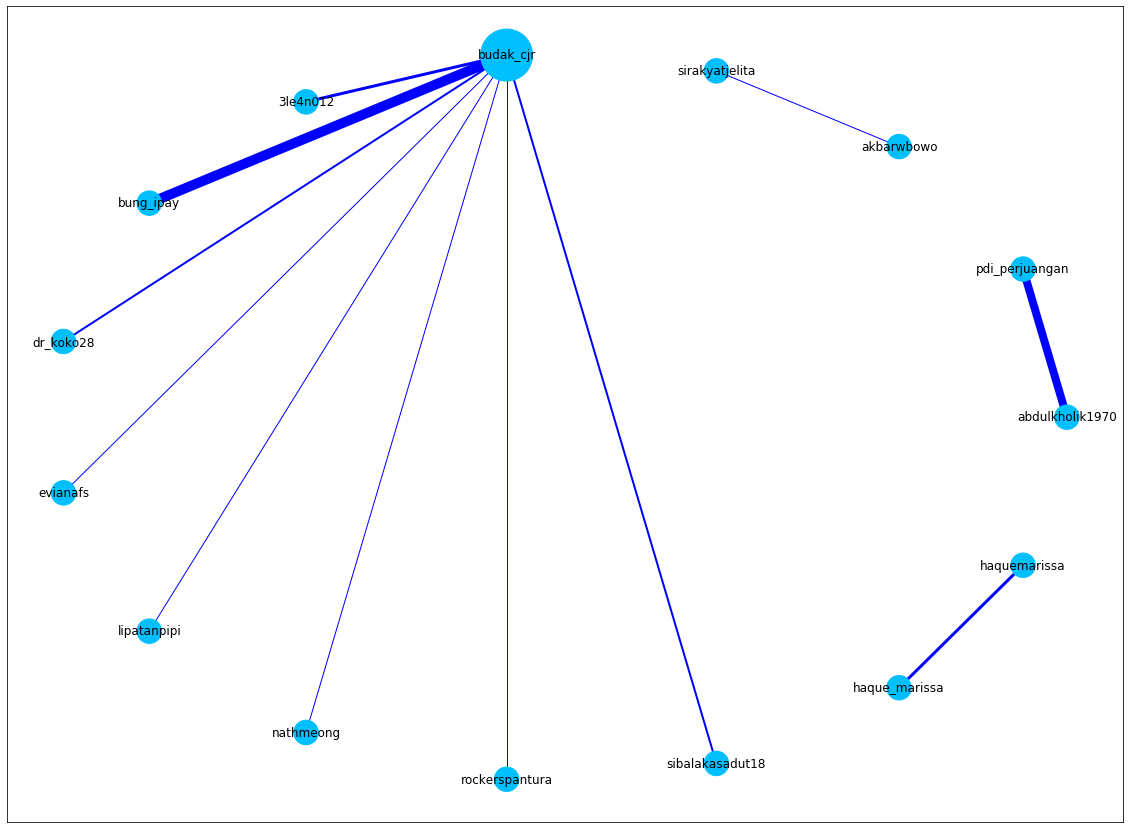

In [ ]:
plt.figure(figsize=(20,15))
pos = nx.circular_layout(retweets_graph_data)
degrees = nx.degree(retweets_graph_data)
node_color = [retweets_graph_data.node[node]['color'] for node in retweets_graph_data]
node_size = [(degrees[v] + 1) * 300.0 for v in retweets_graph_data.nodes()]
edge_color = [retweets_graph_data[u][v]['color'] for u,v in retweets_graph_data.edges()]
edge_weight = [retweets_graph_data[u][v]['weight'] for u,v in retweets_graph_data.edges()]
edge_discretization = discretization_weight(edge_weight)

nx.draw_networkx(retweets_graph_data, pos=pos, cmap=plt.cm.PiYG, node_color=node_color, node_size=node_size, edge_color=edge_color, width=edge_discretization)

Menampilkan 5 node dengan nilai degree terbesar

In [ ]:
sorted(retweets_graph_data.degree, key=lambda x: x[1], reverse=True)[:5]

[('budak_cjr', 8),
 ('abdulkholik1970', 1),
 ('pdi_perjuangan', 1),
 ('akbarwbowo', 1),
 ('sirakyatjelita', 1)]

Menampilkan graph untuk memetakan interaksi reply_to pada pengguna

In [ ]:
graph_data = nx.Graph()

for i, user in users_df.iterrows():
    for j, replyto in users_df.iterrows():
        replyto_data = final_replyto.loc[[user['username']], [replyto['username']]]
        replyto_value = replyto_data[replyto['username']][0]
        #check jika kedua user punya interaksi mentions
        if replyto_value > 50:
            #check agar user tidak berinteraksi mentions dengan dirinya sendiri
            if user['username'] != replyto['username']:
                #check jika edge kedua user belum ada
                check_edge = graph_data.get_edge_data(user['username'], replyto['username'], default=0)
                if check_edge != 0:
                    #check apakah warna edge nya hitam
                    if graph_data[user['username']][replyto['username']]['color'] != 'blue' or graph_data[user['username']][replyto['username']]['color'] != 'green' or graph_data[user['username']][replyto['username']]['color'] != 'red':
                            graph_data.add_node(user['username'], weight=replyto_value, color='#FF1493')
                            graph_data.add_node(replyto['username'], weight=replyto_value, color='#FF1493')
                            graph_data.add_edge(user['username'],replyto['username'], weight=replyto_value, color='red')
                else:
                    graph_data.add_node(user['username'], weight=replyto_value, color='#FF1493')
                    graph_data.add_node(replyto['username'], weight=replyto_value, color='#FF1493')
                    graph_data.add_edge(user['username'],replyto['username'], weight=replyto_value, color='red')

Menyalin nilai retweets graph

In [ ]:
replyto_graph_data = graph_data.copy()

Menyimpan data ke file graphml

In [ ]:
nx.write_graphml(replyto_graph_data, "../data/interractions/covid/replyto_graphml_{}-{}.graphml".format(date_start_convert, date_end_convert))  

membaca data file graph

In [ ]:
replyto_graph_data = nx.read_graphml("../data/interractions/covid/replyto_graphml_{}-{}.graphml".format(date_start_convert, date_end_convert))  

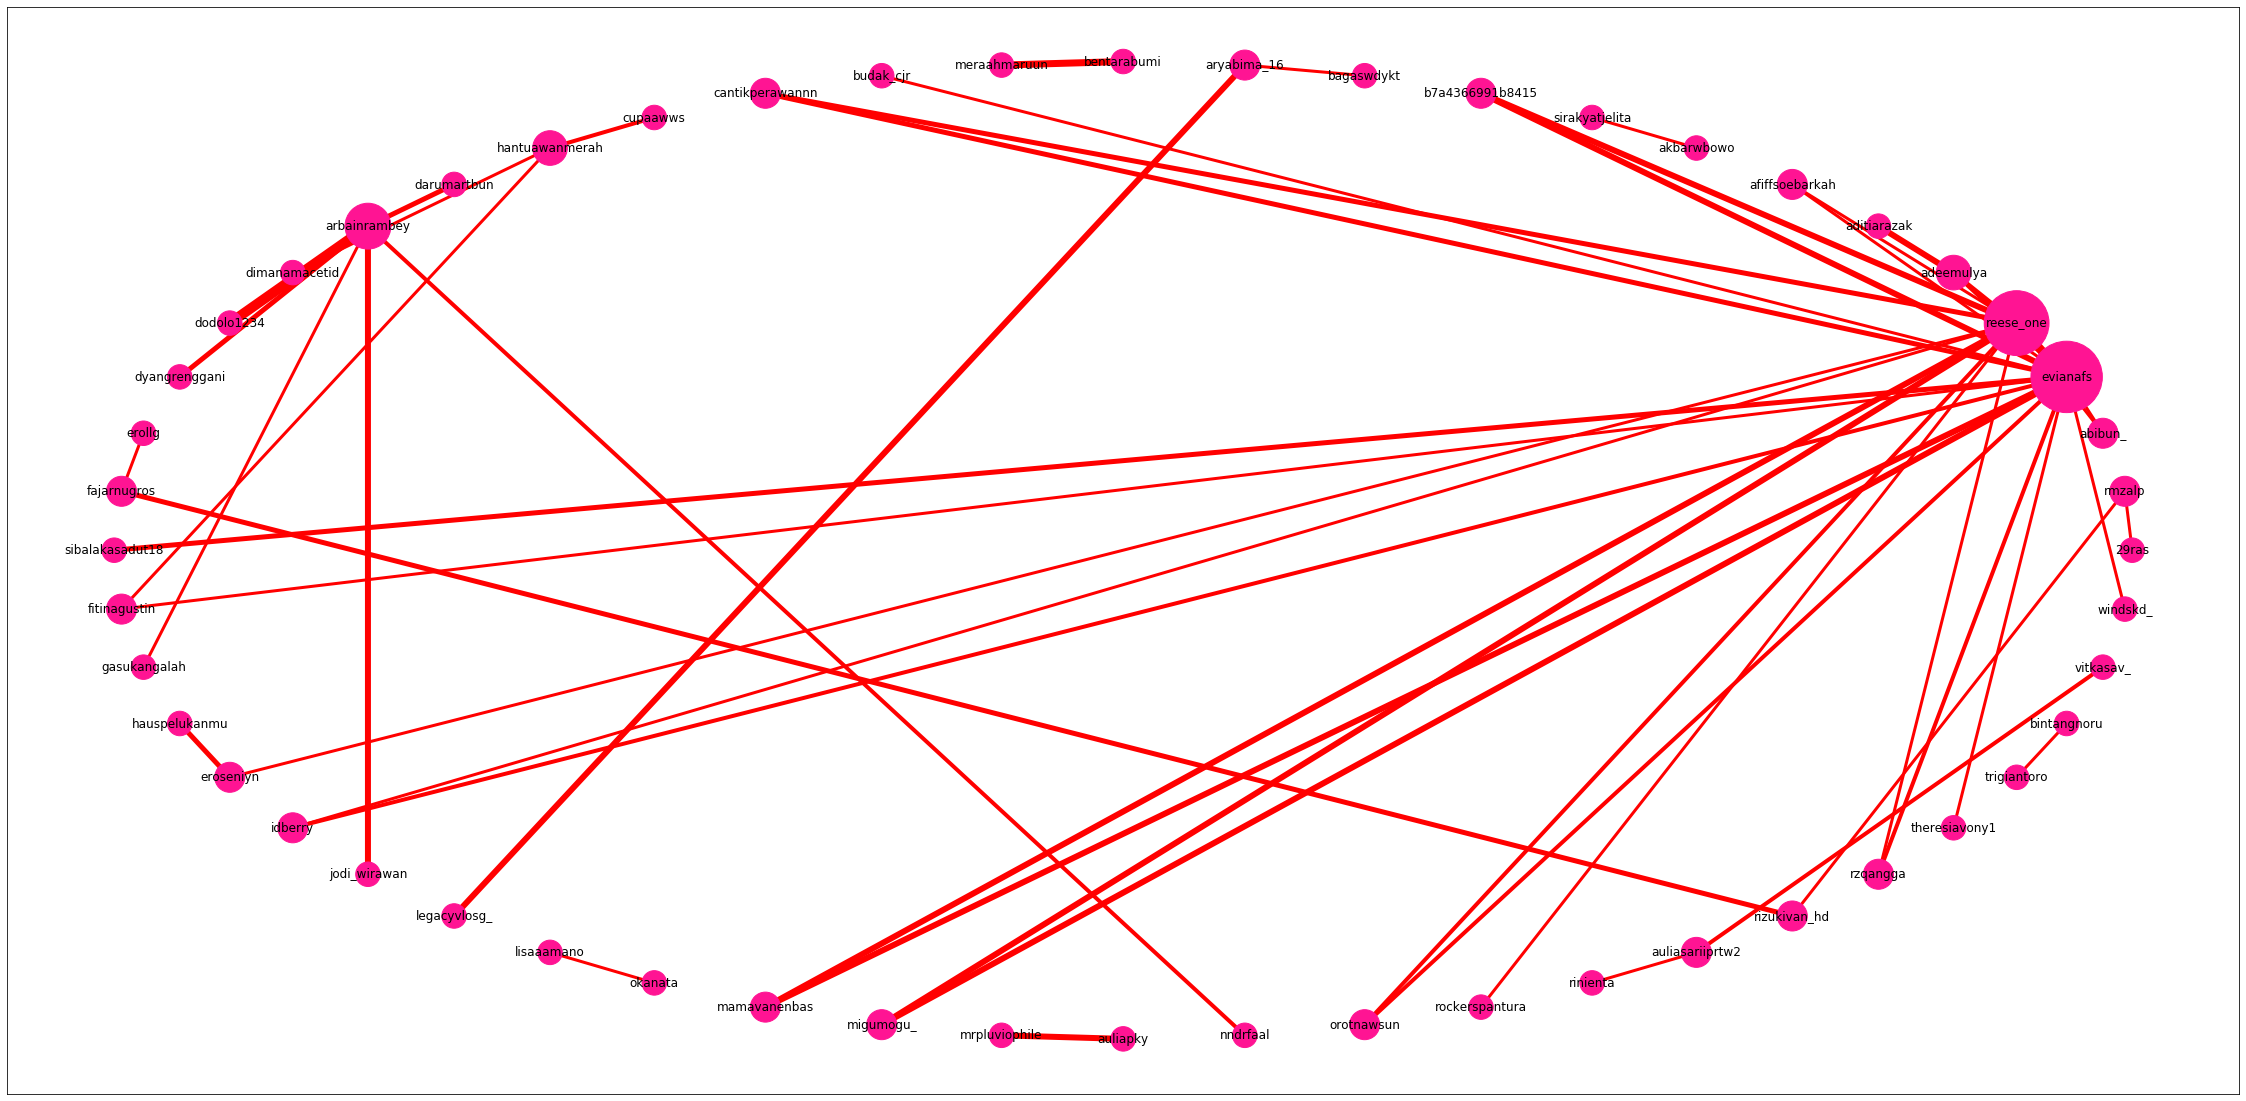

In [ ]:
plt.figure(figsize=(40,20))
pos = nx.circular_layout(replyto_graph_data)
degrees = nx.degree(replyto_graph_data)
node_color = [replyto_graph_data.node[node]['color'] for node in replyto_graph_data]
node_size = [(degrees[v] + 1) * 300.0 for v in replyto_graph_data.nodes()]
edge_color = [replyto_graph_data[u][v]['color'] for u,v in replyto_graph_data.edges()]
edge_weight = [replyto_graph_data[u][v]['weight'] for u,v in replyto_graph_data.edges()]
edge_discretization = discretization_weight(edge_weight)

nx.draw_networkx(replyto_graph_data, pos=pos, cmap=plt.cm.PiYG, node_color=node_color, node_size=node_size, edge_color=edge_color, width=edge_discretization)

Menampilkan 5 node dengan nilai degree terbesar

In [ ]:
sorted(replyto_graph_data.degree, key=lambda x: x[1], reverse=True)[:5]

[('evianafs', 16),
 ('reese_one', 13),
 ('arbainrambey', 6),
 ('adeemulya', 3),
 ('hantuawanmerah', 3)]

Melakukan penggabungan data aktivitas secara keseluruhan

In [ ]:
first_join = nx.Graph()
second_join = nx.Graph()
all_graph_data = nx.Graph()

In [ ]:
first_join = nx.compose(mentions_graph_data, retweets_graph_data)
second_join = nx.compose(first_join, replyto_graph_data)

In [ ]:
all_graph_data = second_join.copy()

Menyimpan data ke file graphml

In [ ]:
nx.write_graphml(all_graph_data, "../data/interractions/covid/all_data_graphml_{}-{}.graphml".format(date_start_convert, date_end_convert))  

membaca data file graph

In [ ]:
all_graph_data = nx.read_graphml("../data/interractions/covid/all_data_graphml_{}-{}.graphml".format(date_start_convert, date_end_convert))  

Menampilkan graph untuk memetakan interaksi reply_to pada pengguna

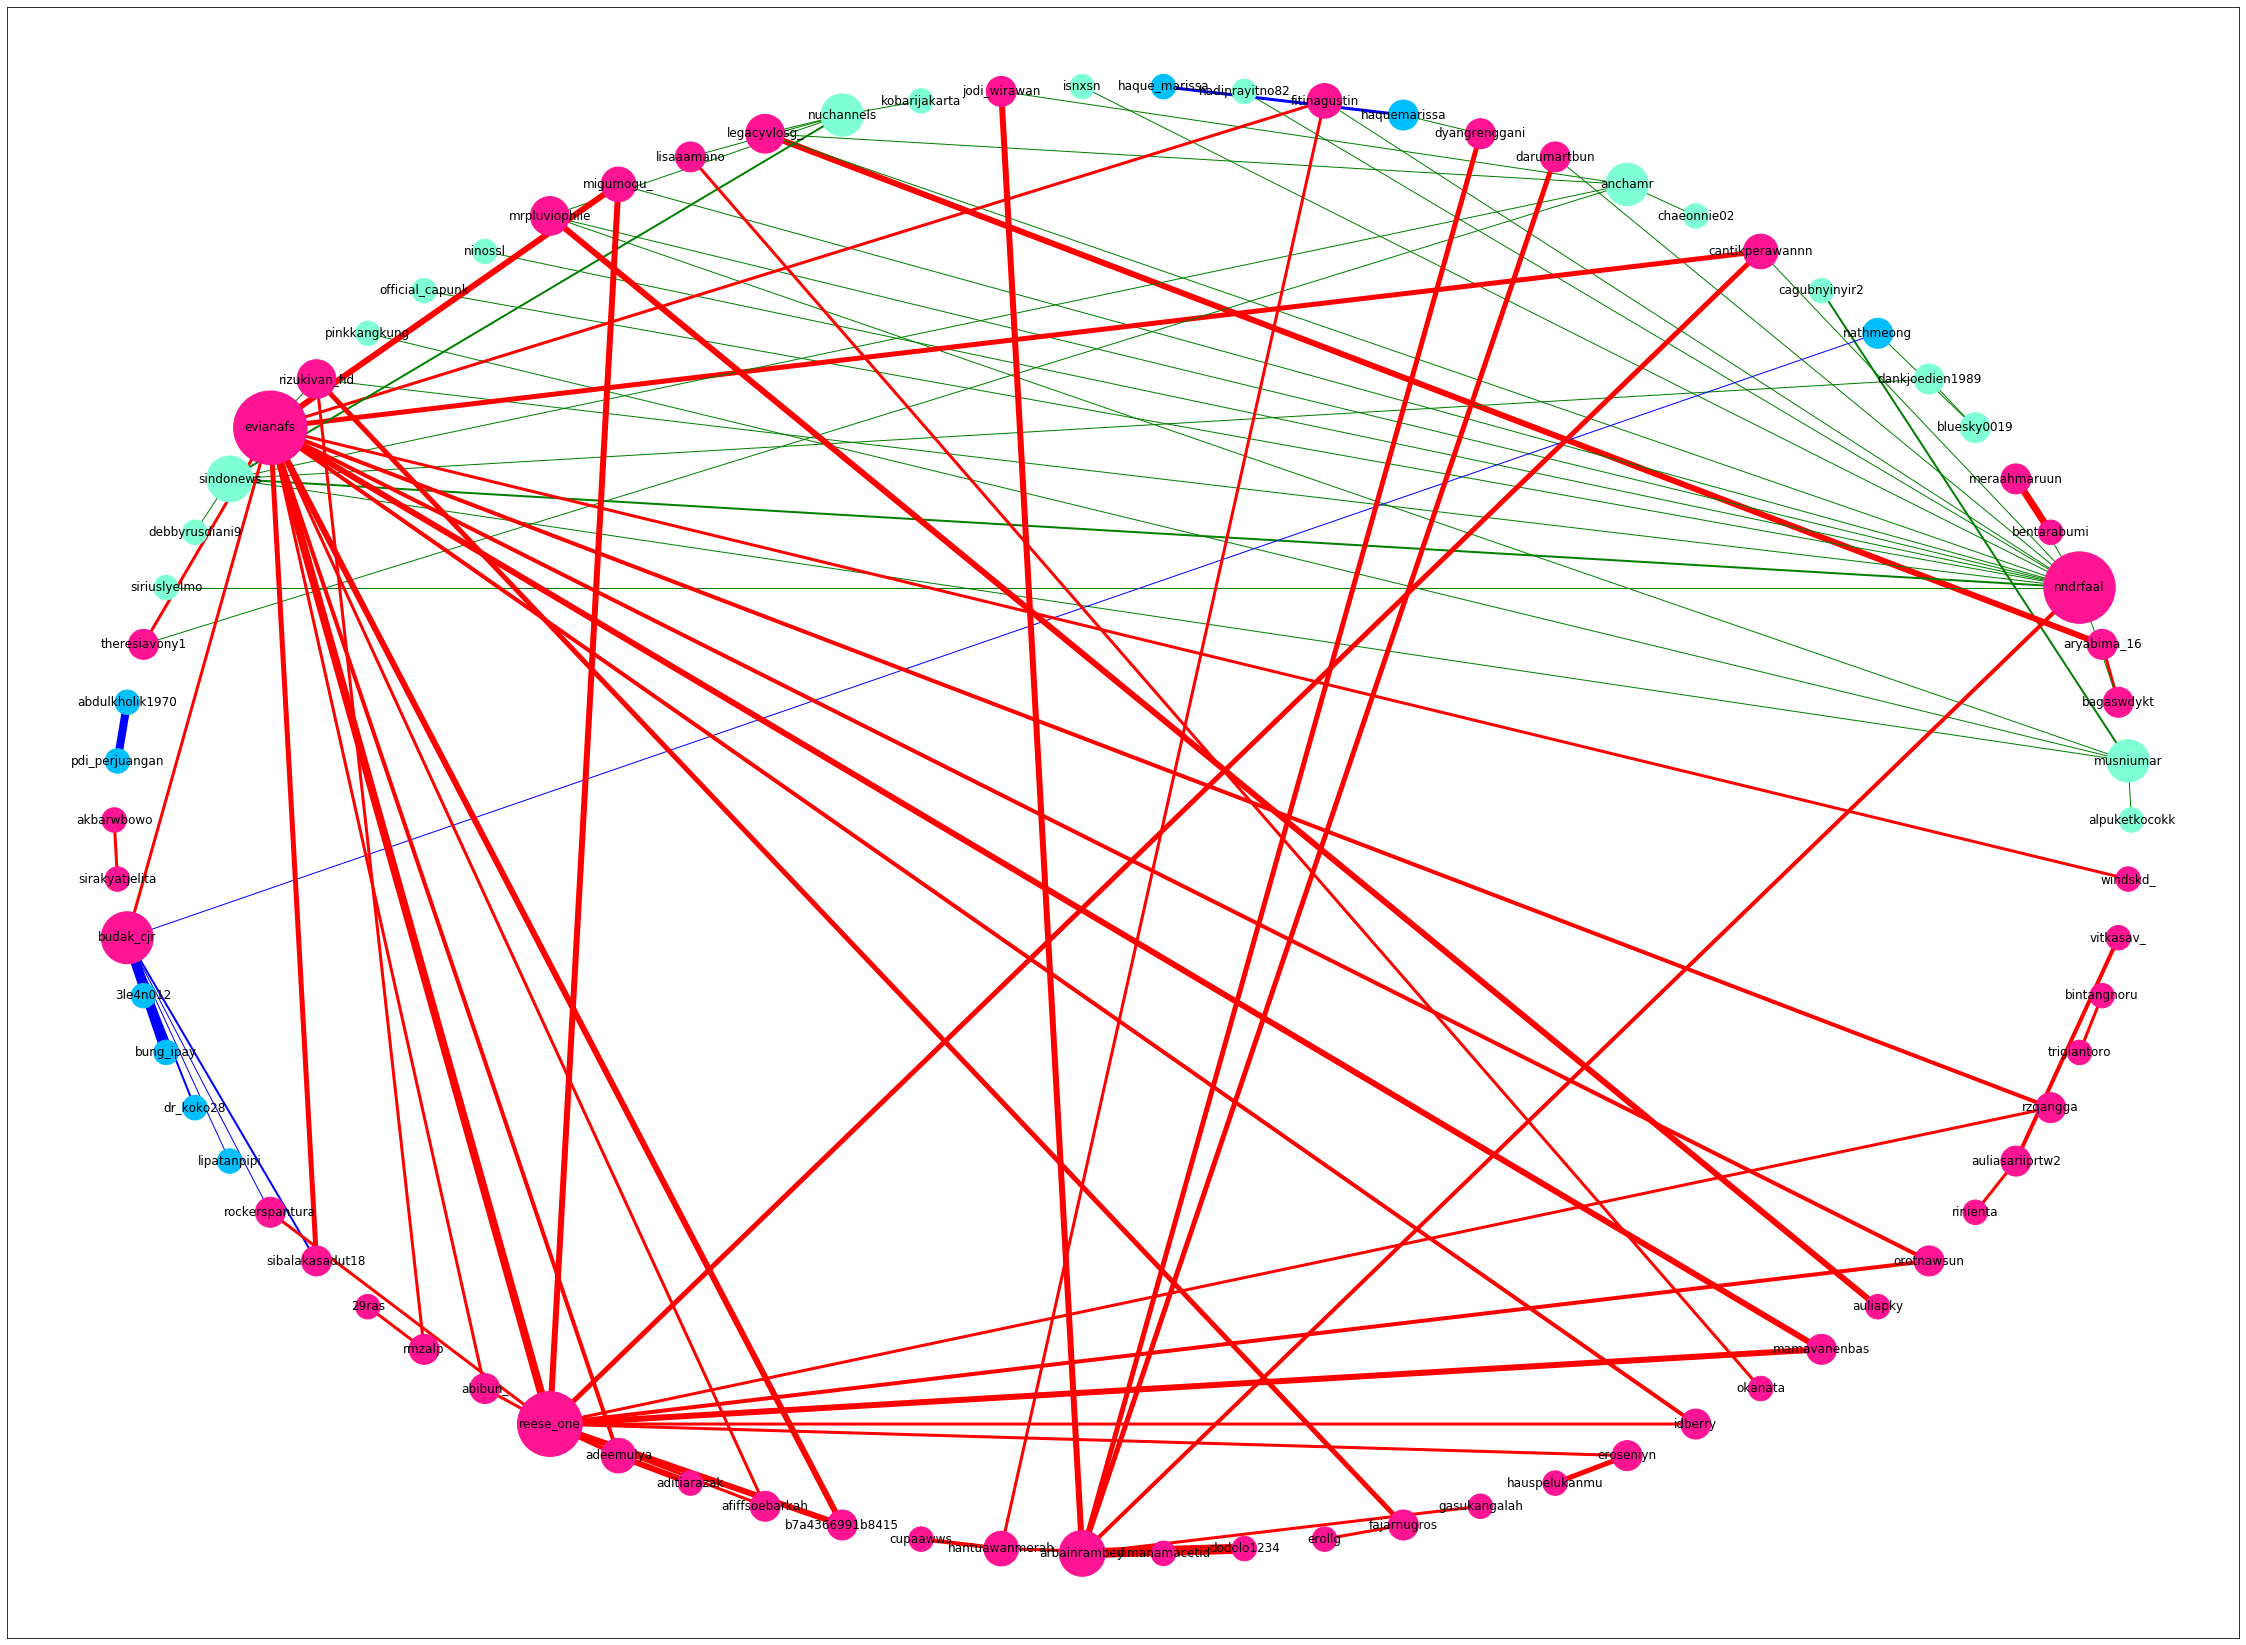

In [ ]:
plt.figure(figsize=(40,30))
pos = nx.circular_layout(all_graph_data)
degrees = nx.degree(all_graph_data)
node_color = [all_graph_data.node[node]['color'] for node in all_graph_data]
node_size = [(degrees[v] + 1) * 300.0 for v in all_graph_data.nodes()]
edge_color = [all_graph_data[u][v]['color'] for u,v in all_graph_data.edges()]
edge_weight = [all_graph_data[u][v]['weight'] for u,v in all_graph_data.edges()]
edge_discretization = discretization_weight(edge_weight)

nx.draw_networkx(all_graph_data, pos=pos, cmap=plt.cm.PiYG, node_color=node_color, node_size=node_size, edge_color=edge_color, width=edge_discretization)

**Melakukan seleksi node berdasarkan nilai degree**

In [ ]:
def trim_degrees(g, degree):
    g2=g.copy()
    d=nx.degree(g2)
    list_g2 = list(g2.nodes)
    
    for n in list_g2:
        if d[n]<=degree: 
            g2.remove_node(n)
            
    return g2

In [ ]:
selected_graph = trim_degrees(all_graph_data, 1)
print('Sisa node:', len(selected_graph), 'nodes')

Sisa node: 37 nodes


Menampilkan graph untuk memetakan interaksi reply_to pada pengguna

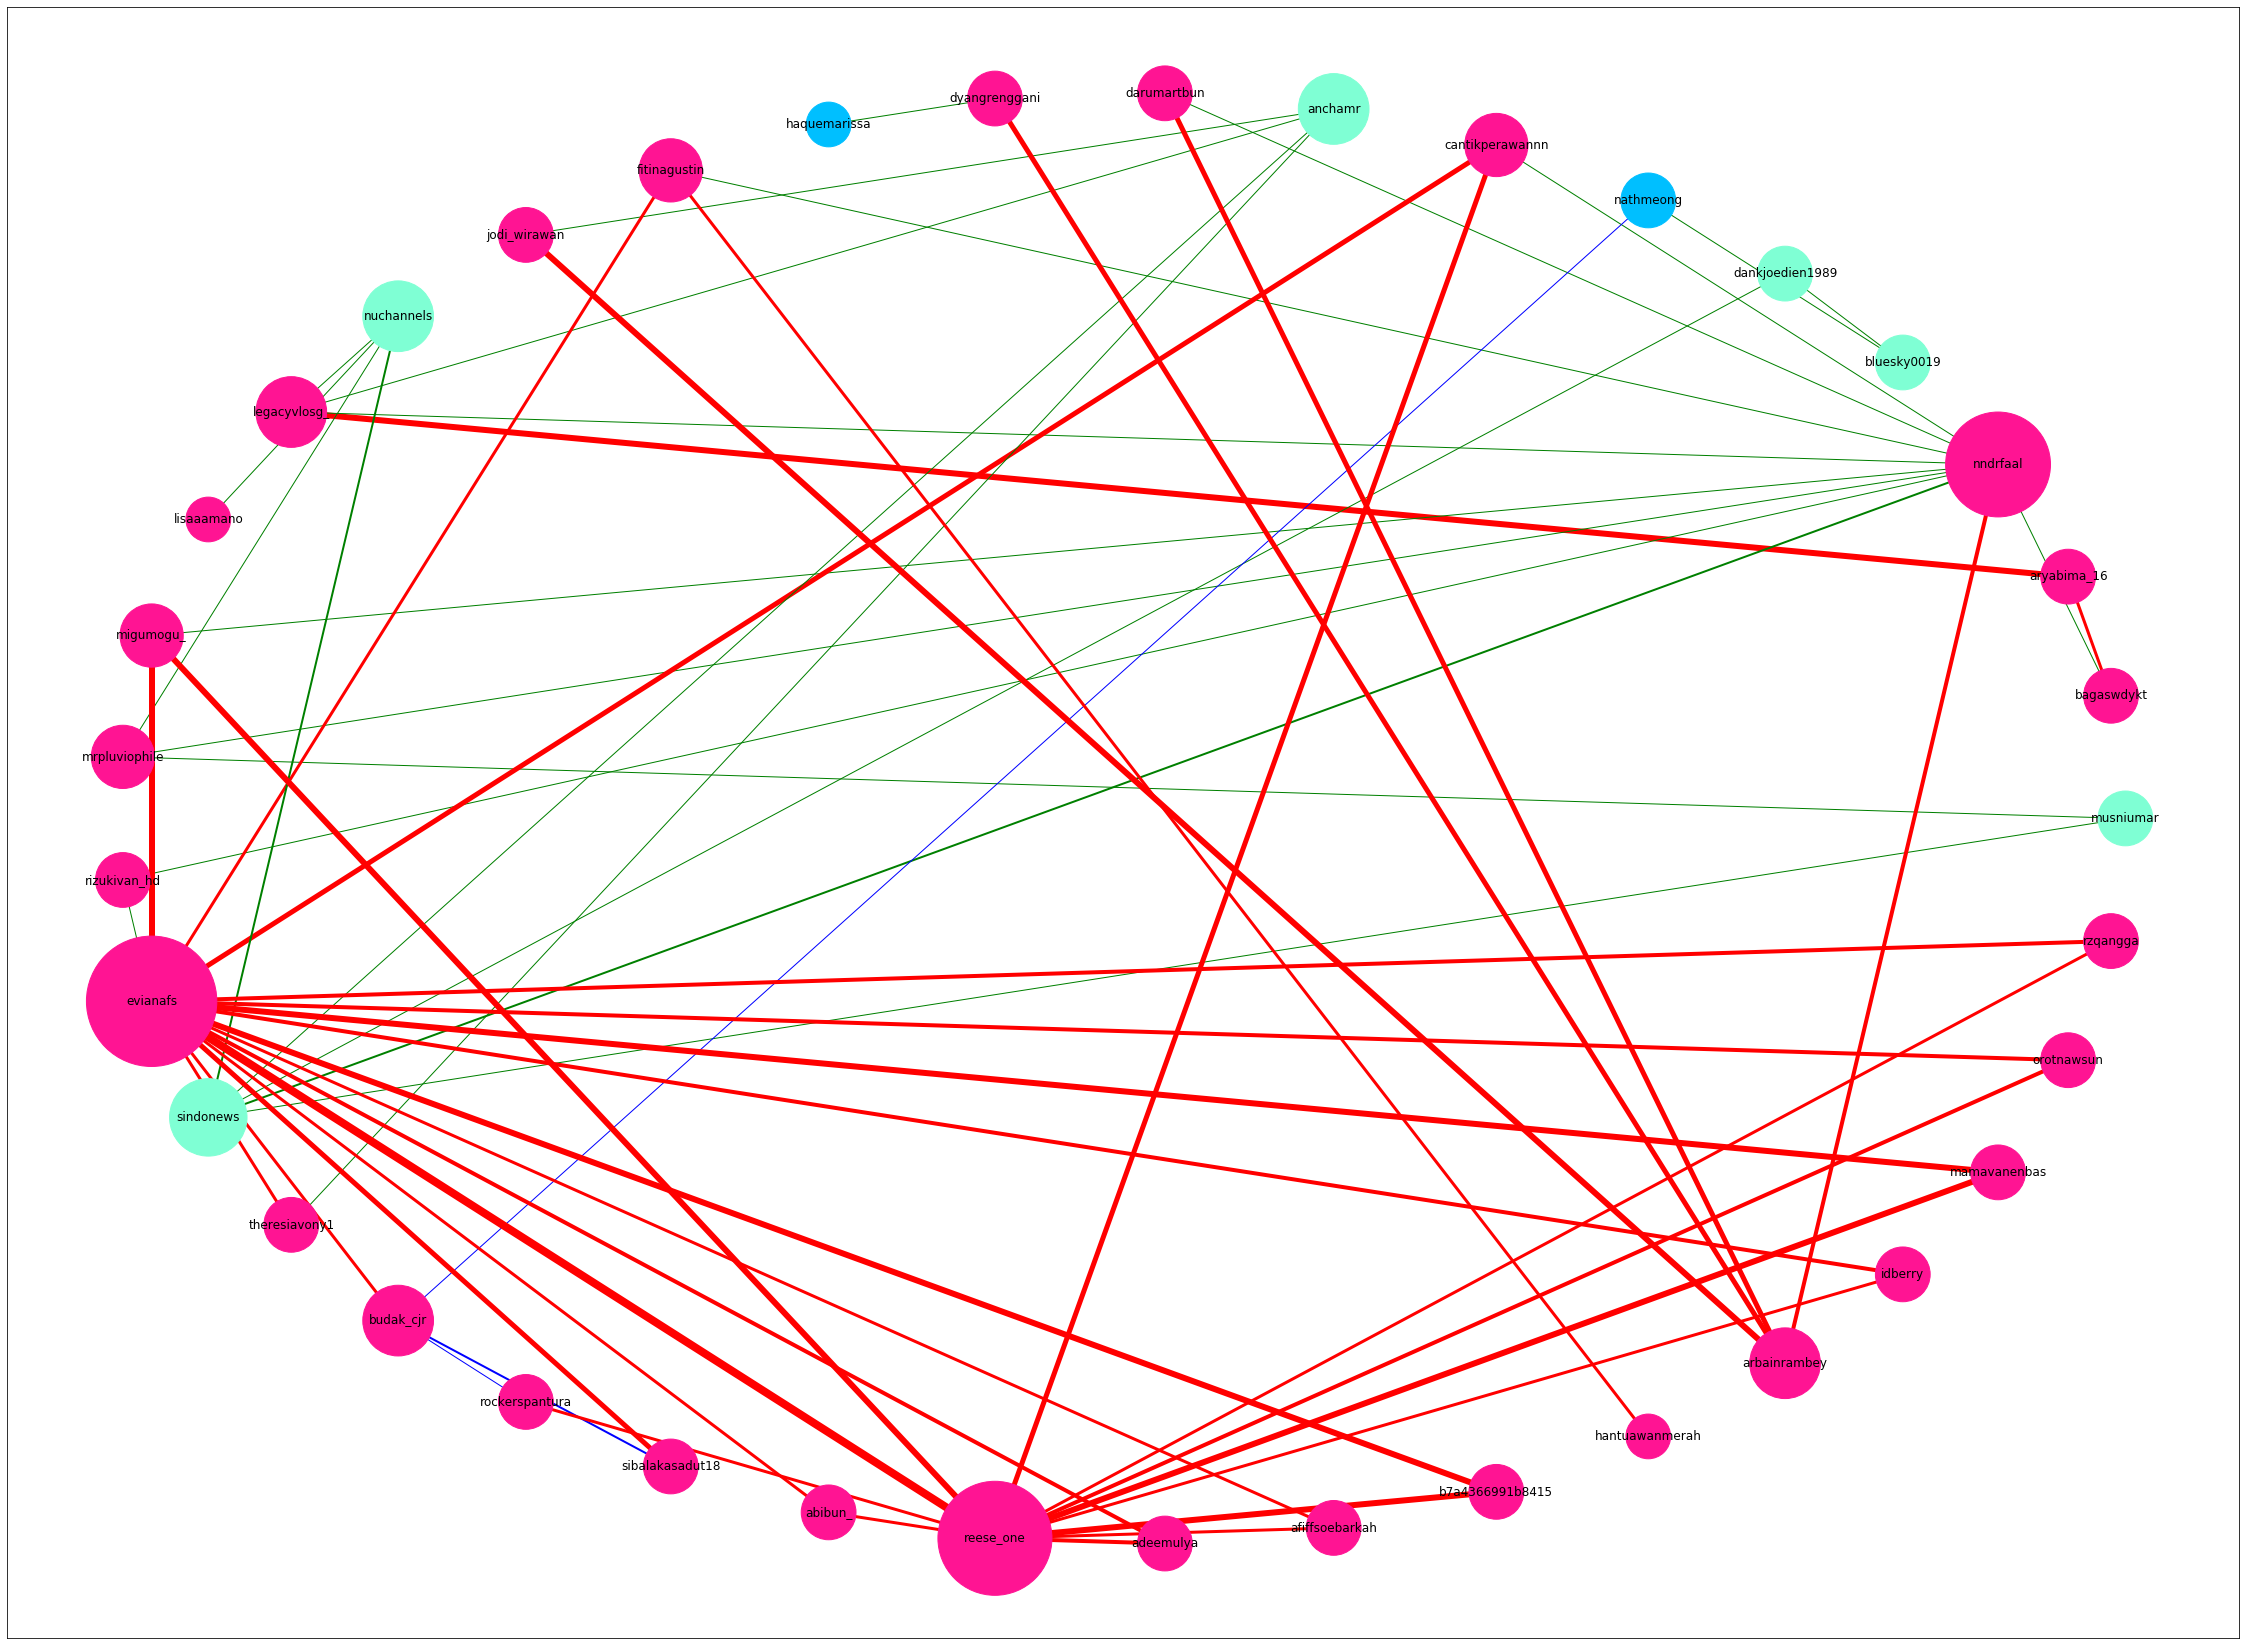

In [ ]:
plt.figure(figsize=(40,30))
pos = nx.circular_layout(selected_graph)
degrees = nx.degree(selected_graph)
node_color = [selected_graph.node[node]['color'] for node in selected_graph]
node_size = [(degrees[v] + 1) * 1000.0 for v in selected_graph.nodes()]
edge_color = [selected_graph[u][v]['color'] for u,v in selected_graph.edges()]
edge_weight = [selected_graph[u][v]['weight'] for u,v in selected_graph.edges()]
edge_discretization = discretization_weight(edge_weight)

nx.draw_networkx(selected_graph, pos=pos, cmap=plt.cm.PiYG, node_color=node_color, node_size=node_size, edge_color=edge_color, width=edge_discretization)

**Melihat centralitas dari node**

In [ ]:
specific_deg=nx.degree(selected_graph)
specific_deg['evianafs']

16

Mengurutkan node berdasarkan nilai degree tertinggi ke terendah

In [ ]:
def sorted_map(map):
    ms = sorted(map.items(), key=lambda x: x[1], reverse=True)
    return ms

In [ ]:
node_degree = nx.degree(selected_graph)
ds=sorted_map(dict(node_degree))

ds[0:9]

[('evianafs', 16),
 ('reese_one', 12),
 ('nndrfaal', 10),
 ('sindonews', 5),
 ('anchamr', 4),
 ('nuchannels', 4),
 ('legacyvlosg_', 4),
 ('budak_cjr', 4),
 ('arbainrambey', 4)]

**Menampilkan histogram data**

Melihat ditribusi centralitas dari semua nodes dengan histogram

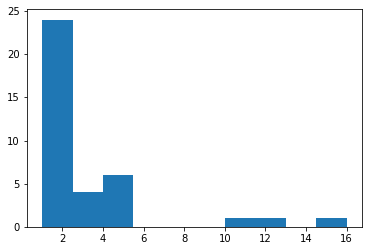

In [ ]:
def plot_degree_dist(G):
    degrees = [selected_graph.degree(n) for n in selected_graph.nodes()]
    plt.hist(degrees)
    plt.show()

graph_dist = plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))

Melihat ditribusi centralitas dari semua nodes dengan log-log space histogram

In [ ]:
def plot_degree_histogram(g, normalized=True, weight=None):
    
    degree_sequence = sorted([d for n, d in g.degree(weight=weight)], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    aux_x, aux_y = zip(*degreeCount.items())

    n_nodes = g.number_of_nodes()
    aux_y = list(aux_y)
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y

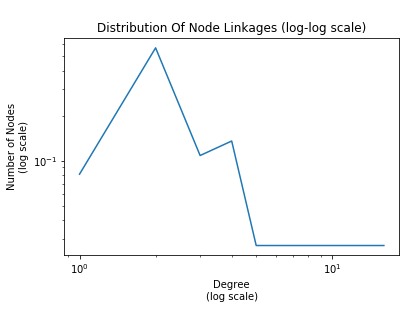

In [ ]:
plotplot_hist = plot_degree_histogram(selected_graph)

plt.title('\nDistribution Of Node Linkages (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(plotplot_hist[0], plotplot_hist[1])

**Membuat Snowball Sampling**

Membuat function untuk mendefenisikan queue

In [ ]:
class Queue():
    # Constructor creates a list
    def __init__(self):
        self.queue = list()

    # Adding elements to queue
    def enqueue(self, data):
        # Checking to avoid duplicate entry (not mandatory)
        if data not in self.queue:
            self.queue.insert(0, data)
            return True
        return False

    # Removing the last element from the queue
    def dequeue(self):
        if len(self.queue) > 0:
            return self.queue.pop()
        else:
            # plt.show()
            exit()

    # Getting the size of the queue
    def size(self):
        return len(self.queue)

    # printing the elements of the queue
    def printQueue(self):
        return self.queue

Membuat function untuk menentukan snowball sampling

In [ ]:
class Snowball():

    def __init__(self):
        self.G1 = nx.Graph()

    def snowball(self, G, size, k):
        q = Queue()
        list_nodes = list(G.nodes())
        m = k
        dictt = set()
        while(m):
            id = random.sample(list(G.nodes()), 1)[0]
            q.enqueue(id)
            m = m - 1
        # print(q.printQueue())
        while(len(self.G1.nodes()) <= size):
            if(q.size() > 0):
                id = q.dequeue()
                self.G1.add_node(id)
                if(id not in dictt):
                    dictt.add(id)
                    list_neighbors = list(G.neighbors(id))
                    if(len(list_neighbors) > k):
                        for x in list_neighbors[:k]:
                            q.enqueue(x)
                            self.G1.add_edge(id, x)
                    elif(len(list_neighbors) <= k and len(list_neighbors) > 0):
                        for x in list_neighbors:
                            q.enqueue(x)
                            self.G1.add_edge(id, x)
                else:
                    continue
            else:
                initial_nodes = random.sample(list(G.nodes()) and list(dictt), k)
                no_of_nodes = len(initial_nodes)
                for id in initial_nodes:
                    q.enqueue(id)
        return self.G1

Memanggil function snowball sampling

In [ ]:
#make an object and call function SB
snowball_object = Snowball()
snowball_graph = snowball_object.snowball(selected_graph, 20, 5) # graph, number of nodes to sample , k set
print("Snowball Sampling:")
print("Number of nodes sampled=",len(snowball_graph.nodes()))
print("List of of nodes sampled=",(snowball_graph.nodes()))
print('')
print("Number of edges sampled=",len(snowball_graph.edges()))
print("List of edges sampled=",(snowball_graph.edges()))

Snowball Sampling:
Number of nodes sampled= 21
List of of nodes sampled= ['aryabima_16', 'bagaswdykt', 'legacyvlosg_', 'hantuawanmerah', 'fitinagustin', 'reese_one', 'cantikperawannn', 'migumogu_', 'evianafs', 'rockerspantura', 'abibun_', 'dankjoedien1989', 'bluesky0019', 'sindonews', 'nndrfaal', 'anchamr', 'nuchannels', 'rizukivan_hd', 'budak_cjr', 'nathmeong', 'musniumar']

Number of edges sampled= 29
List of edges sampled= [('aryabima_16', 'bagaswdykt'), ('aryabima_16', 'legacyvlosg_'), ('bagaswdykt', 'nndrfaal'), ('legacyvlosg_', 'nndrfaal'), ('legacyvlosg_', 'anchamr'), ('legacyvlosg_', 'nuchannels'), ('hantuawanmerah', 'fitinagustin'), ('fitinagustin', 'nndrfaal'), ('fitinagustin', 'evianafs'), ('reese_one', 'cantikperawannn'), ('reese_one', 'migumogu_'), ('reese_one', 'evianafs'), ('reese_one', 'rockerspantura'), ('reese_one', 'abibun_'), ('cantikperawannn', 'nndrfaal'), ('cantikperawannn', 'evianafs'), ('migumogu_', 'nndrfaal'), ('migumogu_', 'evianafs'), ('evianafs', 'rizukiva

Menampilkan graph untuk memetakan snowball sampling

/Users/toniafriantoni/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


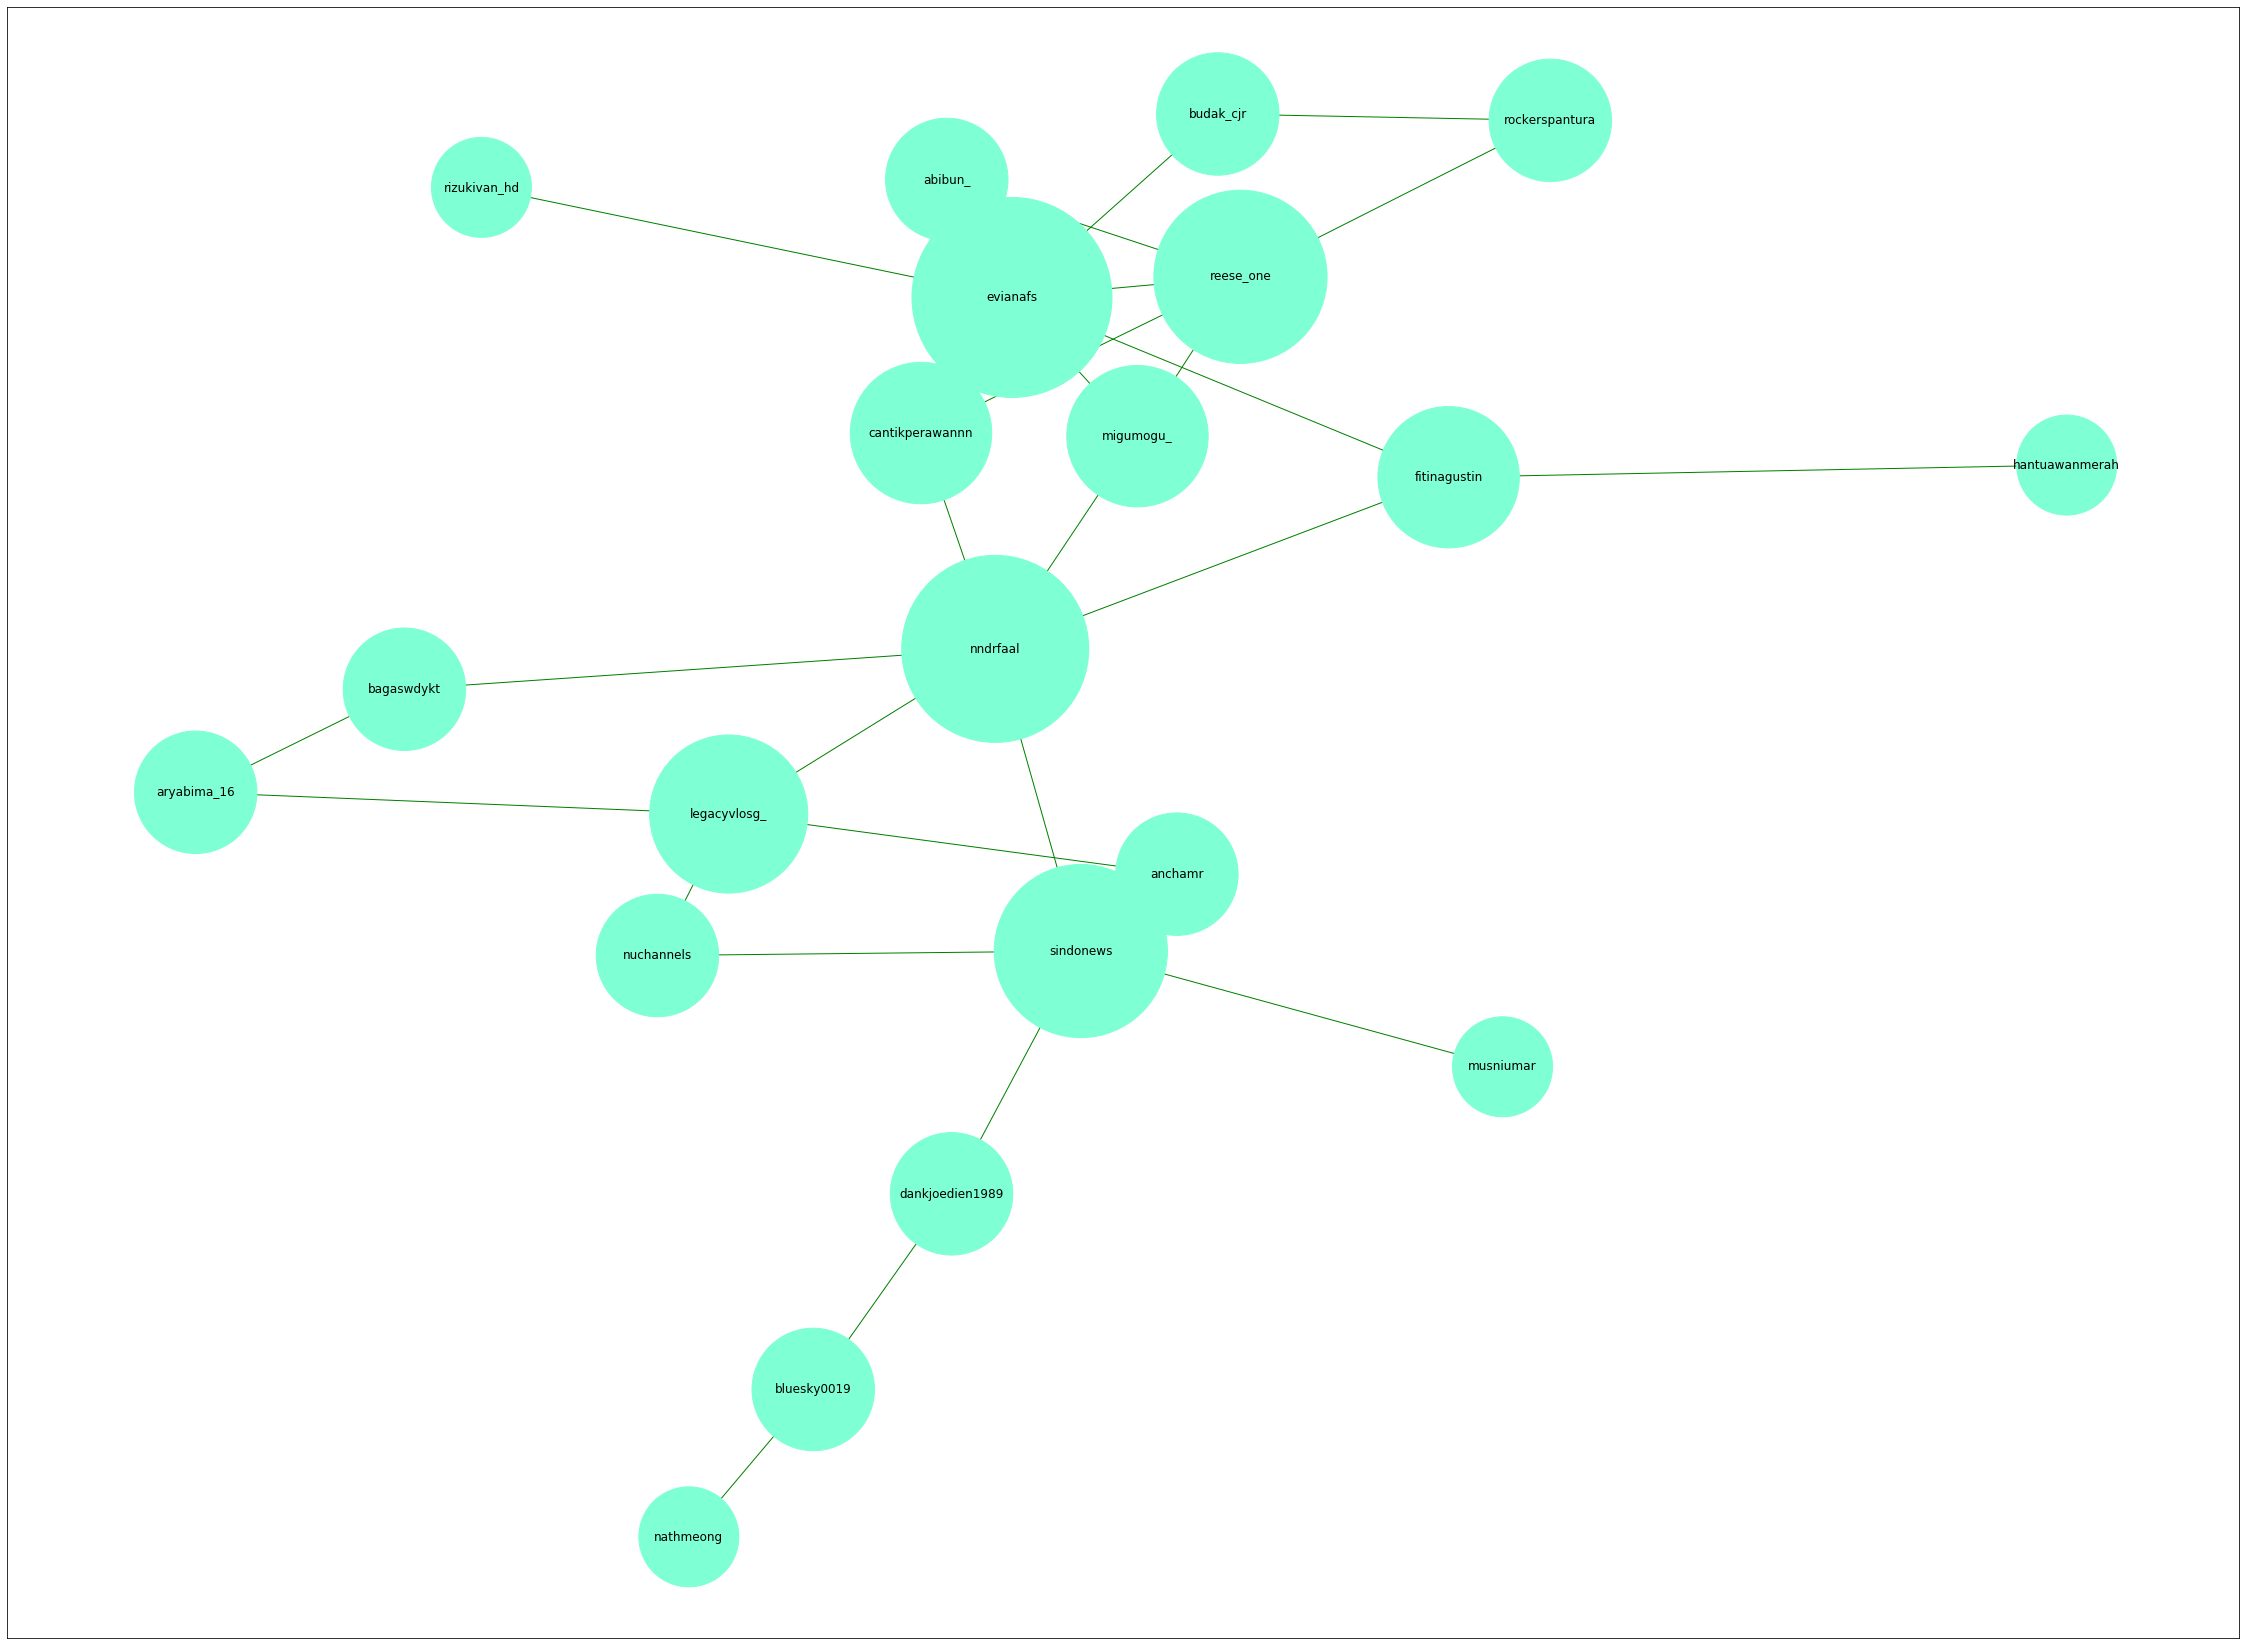

In [ ]:
plt.figure(figsize=(40,30))
pos = nx.spring_layout(snowball_graph)
degrees = nx.degree(snowball_graph)
#node_color = [snowball_graph.node[node]['color'] for node in snowball_graph]
node_size = [(degrees[v] + 1) * 5000.0 for v in snowball_graph.nodes()]
#edge_color = [snowball_graph[u][v]['color'] for u,v in snowball_graph.edges()]
#edge_weight = [snowball_graph[u][v]['weight'] for u,v in snowball_graph.edges()]
#edge_discretization = discretization_weight(edge_weight)

nx.draw_networkx(snowball_graph, pos=pos, cmap=plt.cm.PiYG, node_size=node_size, node_color='#7FFFD4', edge_color='green')

**Menemukan node Gossipmongers**

Melihat data dengan 10 closeness centrality tertinggi

In [ ]:
gossipmongers_nodes = nx.closeness_centrality(selected_graph)
sorted_gossipmongers_nodes=sorted_map(dict(gossipmongers_nodes))

sorted_gossipmongers_nodes[:11]

[('nndrfaal', 0.45569620253164556),
 ('evianafs', 0.45),
 ('cantikperawannn', 0.42857142857142855),
 ('fitinagustin', 0.42857142857142855),
 ('migumogu_', 0.42857142857142855),
 ('rizukivan_hd', 0.4186046511627907),
 ('reese_one', 0.4044943820224719),
 ('theresiavony1', 0.3829787234042553),
 ('anchamr', 0.3711340206185567),
 ('sindonews', 0.3711340206185567),
 ('legacyvlosg_', 0.34951456310679613)]

Menampilkan graph untuk memetakan closeness centrality

/Users/toniafriantoni/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


(-0.8377883890462914,
 1.101787747377297,
 -0.782470602942884,
 1.0001326901707037)

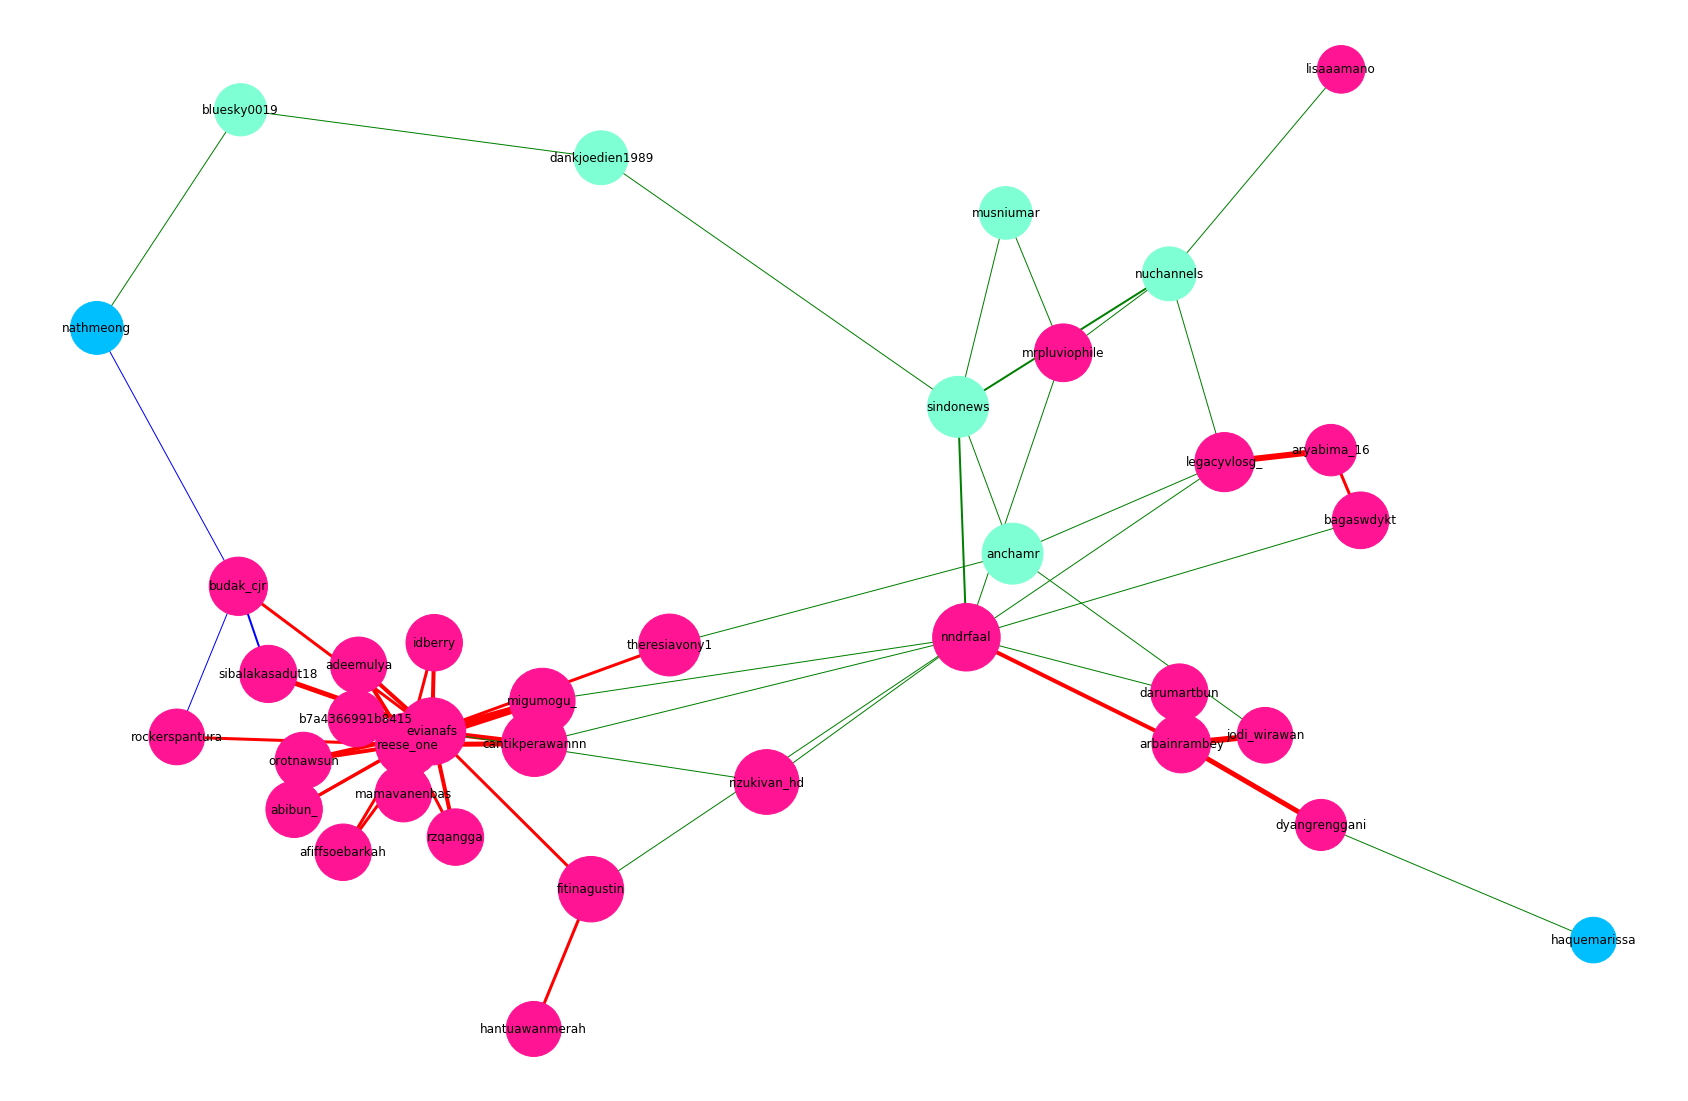

In [ ]:
pos = nx.spring_layout(selected_graph)
closCent = nx.closeness_centrality(selected_graph)
node_color = [selected_graph.node[node]['color'] for node in selected_graph]
node_size = [v * 10000 for v in closCent.values()]
edge_color = [selected_graph[u][v]['color'] for u,v in selected_graph.edges()]
edge_weight = [selected_graph[u][v]['weight'] for u,v in selected_graph.edges()]
edge_discretization = discretization_weight(edge_weight)

plt.figure(figsize=(30,20))
nx.draw_networkx(selected_graph, pos=pos, cmap=plt.cm.PiYG, node_color=node_color, node_size=node_size, edge_color=edge_color, width=edge_discretization)
plt.axis('off')

**Menemukan Communication Bottlenecks dan Community Bridges**

Melihat data dengan 10 betweenness centrality tertinggi

In [ ]:
betweenness_nodes = nx.betweenness_centrality(selected_graph)
sorted_betweenness_nodes=sorted_map(dict(betweenness_nodes))

sorted_betweenness_nodes[:11]

[('nndrfaal', 0.48045094676047045),
 ('evianafs', 0.418912485222009),
 ('sindonews', 0.14822610810706044),
 ('reese_one', 0.13340397697540557),
 ('arbainrambey', 0.1248299319727891),
 ('fitinagustin', 0.10129741070217266),
 ('cantikperawannn', 0.09584331453379072),
 ('migumogu_', 0.09584331453379072),
 ('budak_cjr', 0.07635778242921099),
 ('anchamr', 0.07225323177704132),
 ('legacyvlosg_', 0.0719048588096207)]

Menampilkan graph untuk memetakan betweenness centrality

(-0.945673572635639,
 0.7258140793517691,
 -0.7702552968578694,
 1.0954994202661392)

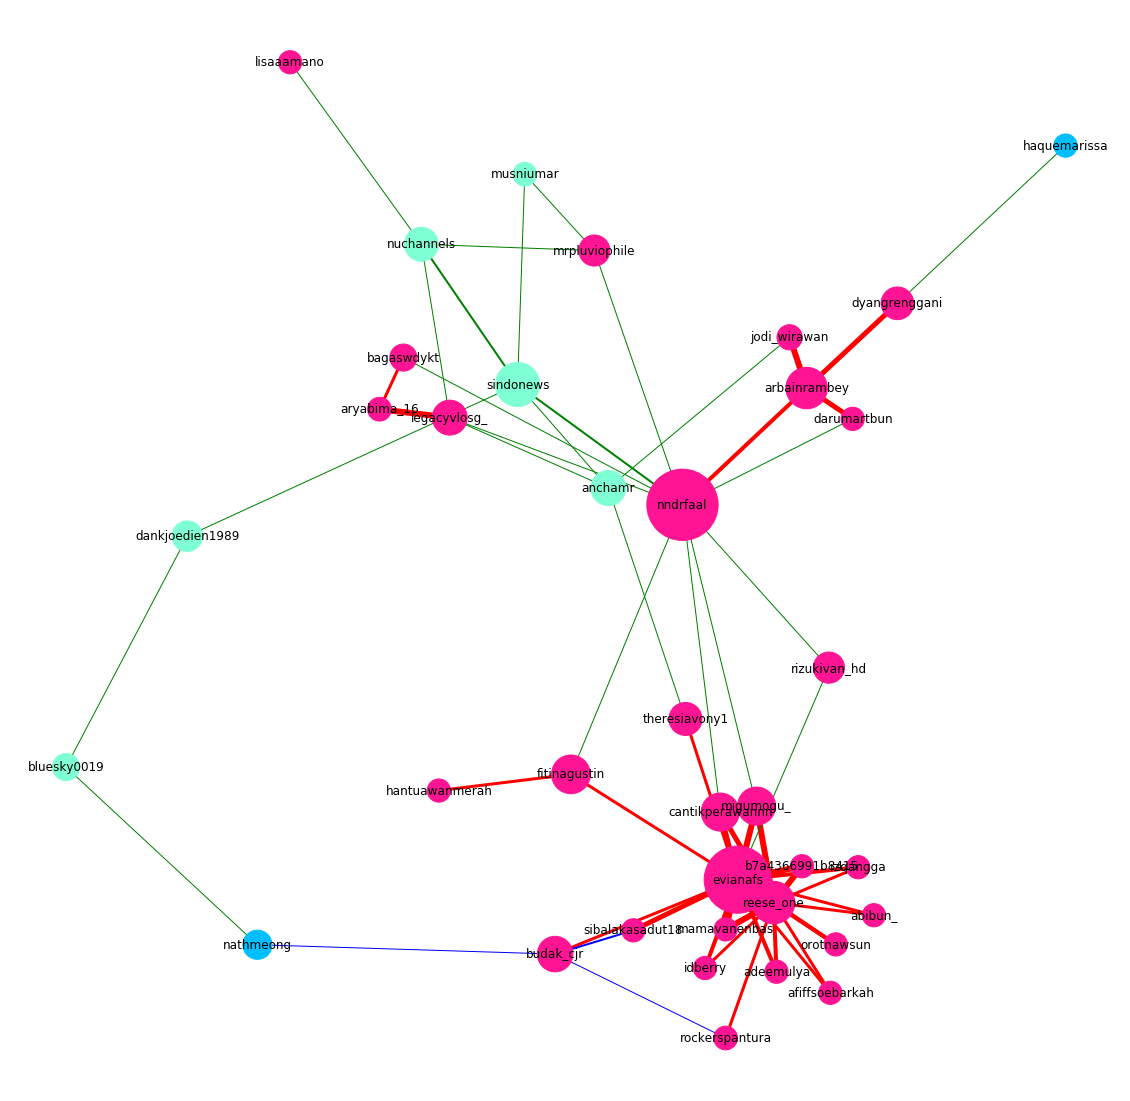

In [ ]:
pos = nx.spring_layout(selected_graph)
betCent = nx.betweenness_centrality(selected_graph, normalized=True, endpoints=True)
node_color = [selected_graph.node[node]['color'] for node in selected_graph]
node_size =  [v * 10000 for v in betCent.values()]
edge_color = [selected_graph[u][v]['color'] for u,v in selected_graph.edges()]
edge_weight = [selected_graph[u][v]['weight'] for u,v in selected_graph.edges()]
edge_discretization = discretization_weight(edge_weight)

plt.figure(figsize=(20,20))
nx.draw_networkx(selected_graph, pos=pos, 
                 with_labels=True,
                 node_color=node_color,
                 node_size=node_size,
                 edge_color=edge_color, 
                 width=edge_discretization)
plt.axis('off')

**Menemukan Eigenvector Centrality**

Melihat data dengan 10 eigenvector centrality tertinggi

In [ ]:
eigenvector_nodes = nx.eigenvector_centrality(selected_graph)
sorted_eigenvector_nodes=sorted_map(dict(eigenvector_nodes))

sorted_eigenvector_nodes[:11]

[('evianafs', 0.5420588613417431),
 ('reese_one', 0.46066228306123364),
 ('cantikperawannn', 0.2129254574533515),
 ('migumogu_', 0.2129254574533515),
 ('abibun_', 0.18217407252980575),
 ('adeemulya', 0.18217407252980575),
 ('afiffsoebarkah', 0.18217407252980575),
 ('b7a4366991b8415', 0.18217407252980575),
 ('idberry', 0.18217407252980575),
 ('mamavanenbas', 0.18217407252980575),
 ('orotnawsun', 0.18217407252980575)]

Menampilkan graph untuk memetakan eigenvector centrality

(-0.6744427519272767,
 1.08466811990608,
 -0.9939040243640418,
 0.8290763762763584)

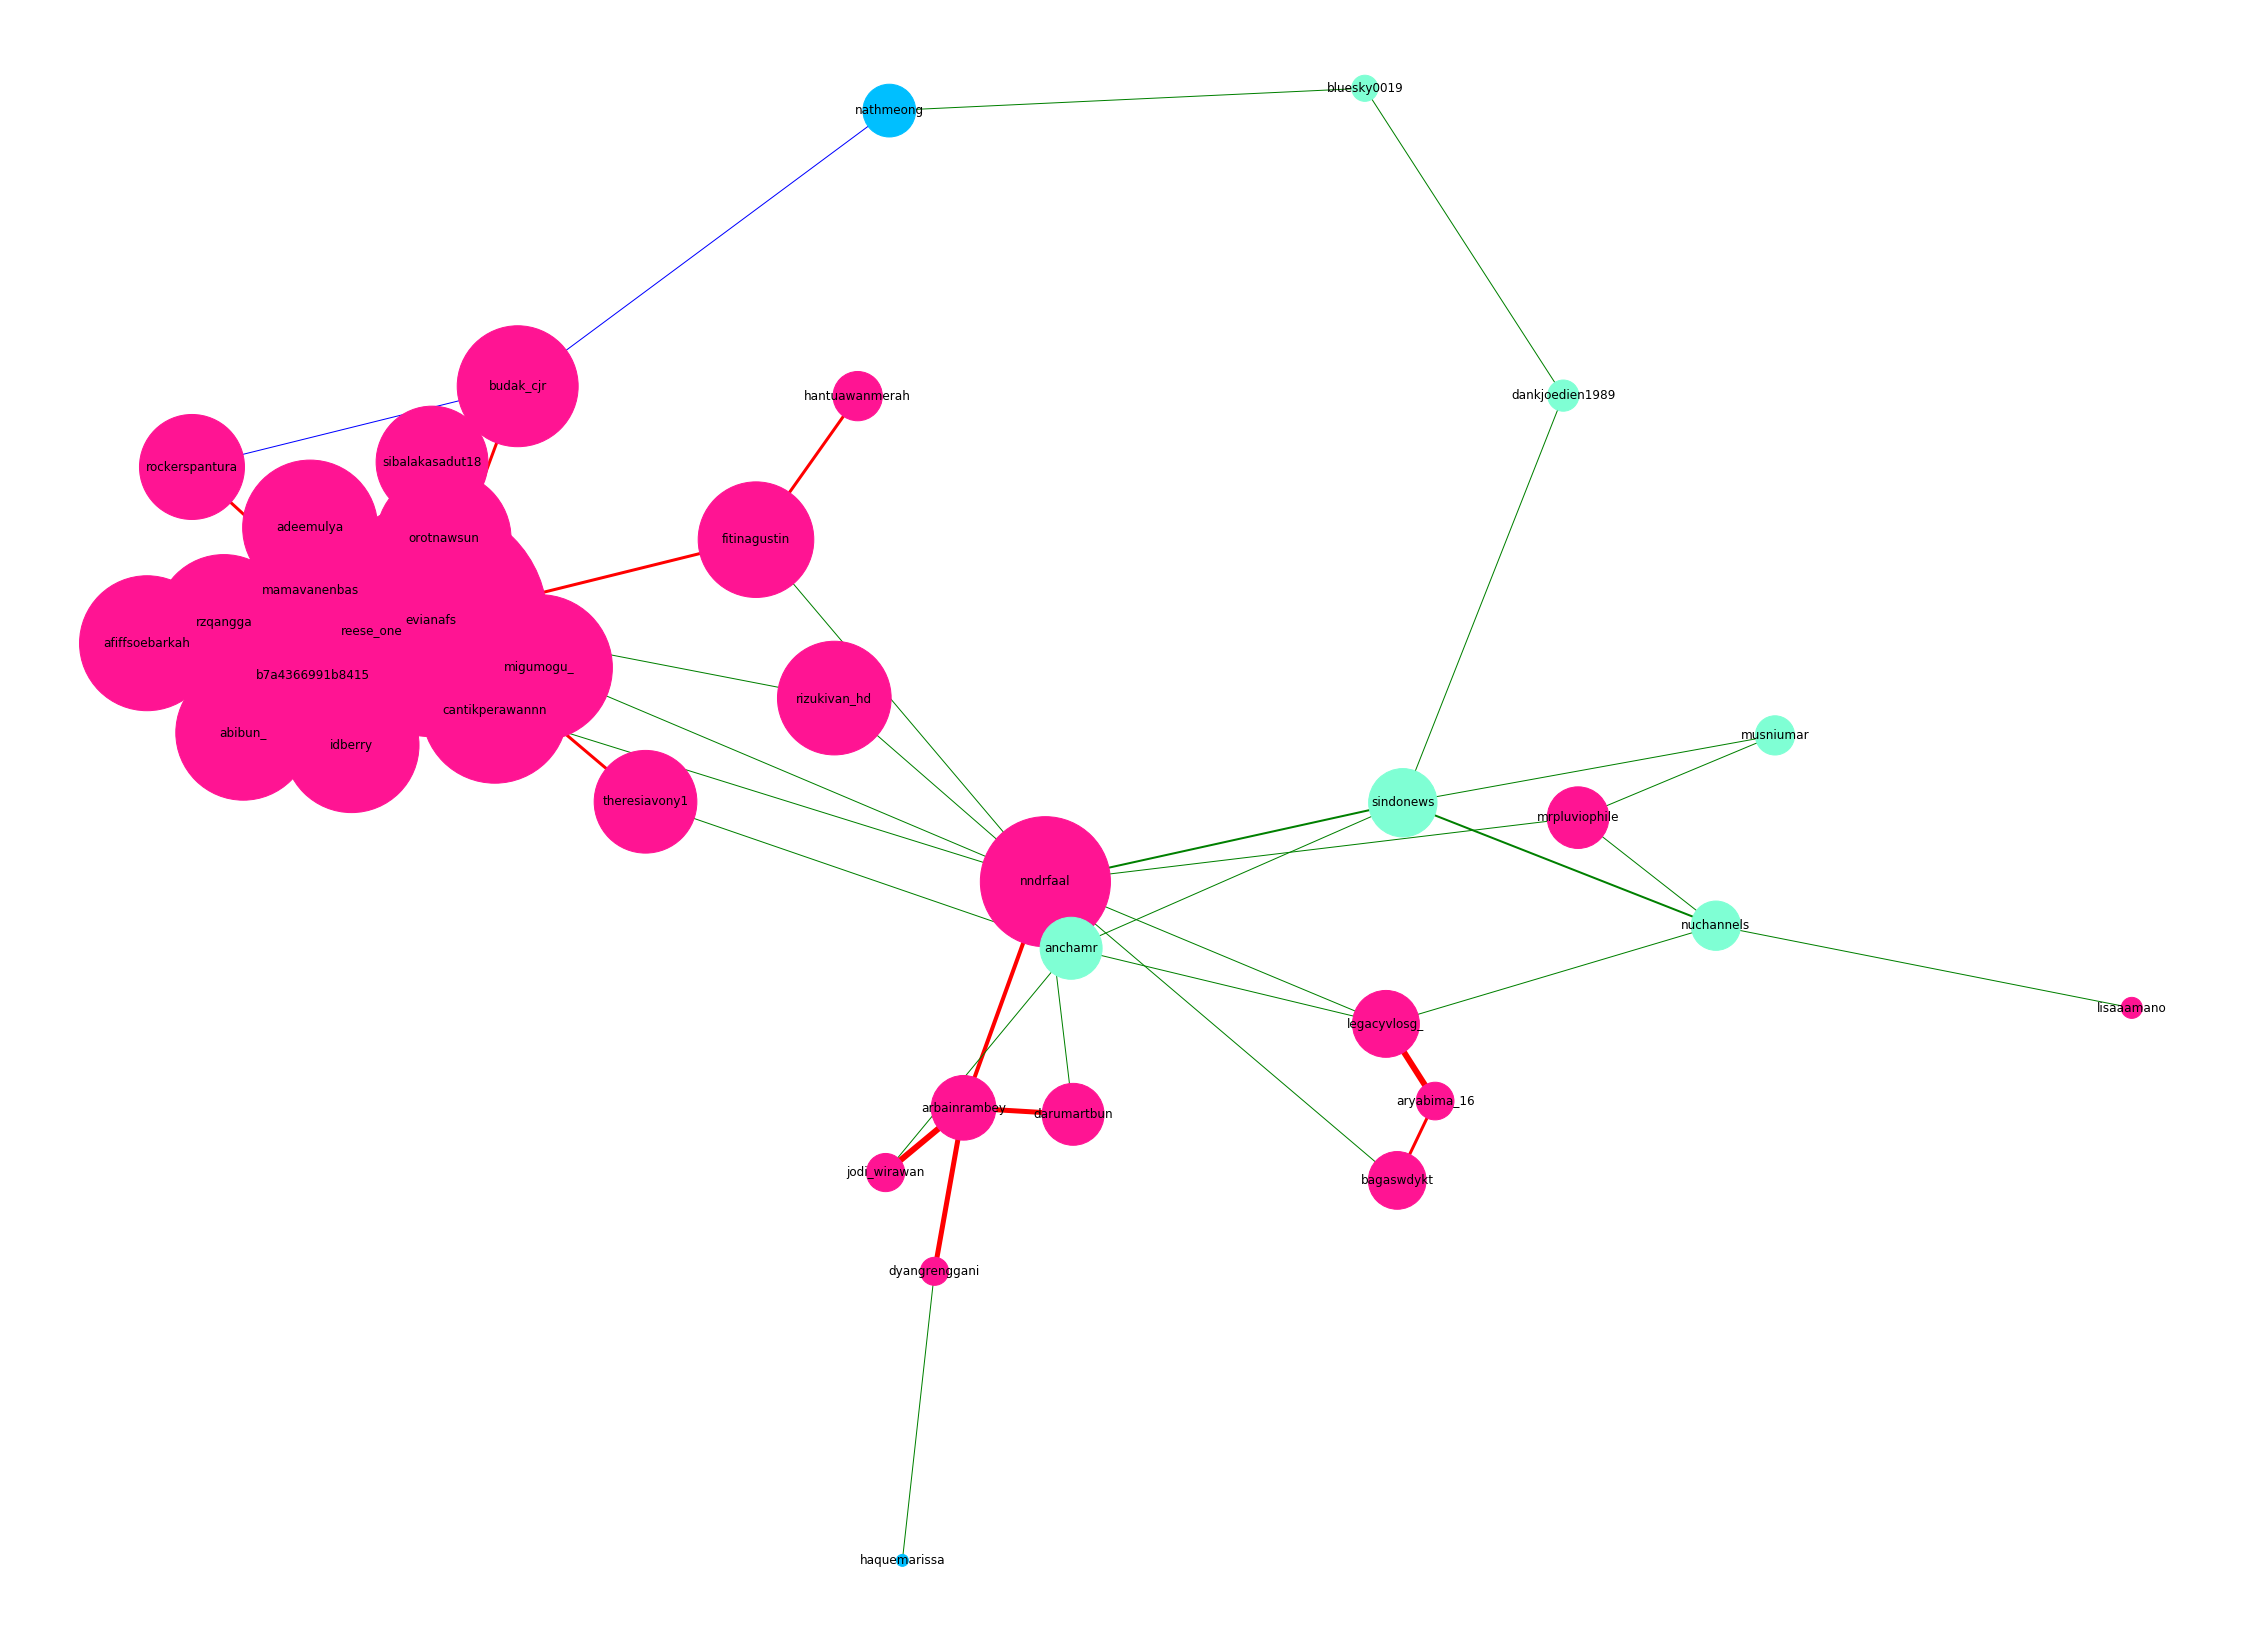

In [ ]:
pos = nx.spring_layout(selected_graph)
betCent = nx.eigenvector_centrality(selected_graph)
degrees = nx.degree(selected_graph)
node_color = [selected_graph.node[node]['color'] for node in selected_graph]
node_size = [v * 100000 for v in betCent.values()]
edge_color = [selected_graph[u][v]['color'] for u,v in selected_graph.edges()]
edge_weight = [selected_graph[u][v]['weight'] for u,v in selected_graph.edges()]
edge_discretization = discretization_weight(edge_weight)

plt.figure(figsize=(40,30))
nx.draw_networkx(selected_graph, pos=pos, cmap=plt.cm.PiYG, node_color=node_color, node_size=node_size, edge_color=edge_color, width=edge_discretization)
plt.axis('off')

**Melihat Interaksi Pengguna dalam satuan Per-Minggu**

Membuat tambahan edge graph untuk memetakan jumlah postingan pengguna setiap minggunya

In [ ]:
user_graph_data = set(selected_graph.nodes())

week_graph_data = selected_graph.copy()

for i, user in users_df.iterrows():
    if user['username'] in user_graph_data:
        for i in range(0, 27):
            node_name = '{}_minggu{}'.format(user['username'],i+1)
            column = 'minggu{}'.format(i+1)
            week_interactions_data = final_week_tweets.loc[[user['username']], [column]]
            week_interactions_value = week_interactions_data[column][0]
            
            #check jika kedua user punya interaksi
            if week_interactions_value > 10:
                week_graph_data.add_node(node_name, weight=week_interactions_value, color='#FFD700')
                week_graph_data.add_edge(user['username'],node_name, weight=week_interactions_value, color='#FFA500')

Menyalin graph data jumlah postingan

In [ ]:
week_interaction_graph_data = week_graph_data.copy()

Menyimpan data ke file graphml

In [ ]:
nx.write_graphml(week_interaction_graph_data, "../data/interractions/covid/week_interaction_graphml_{}-{}.graphml".format(date_start_convert, date_end_convert))  

membaca data file graph

In [ ]:
#week_interaction_graph_data = nx.read_graphml("../data/interractions/covid/week_interaction_graphml_{}-{}.graphml".format(date_start_convert, date_end_convert))  

Menampilkan ke dalam bentuk grapik

(-0.7091823227672586,
 1.0871381382514647,
 -0.6715462079698695,
 0.9970475726537176)

<Figure size 1440x1440 with 0 Axes>

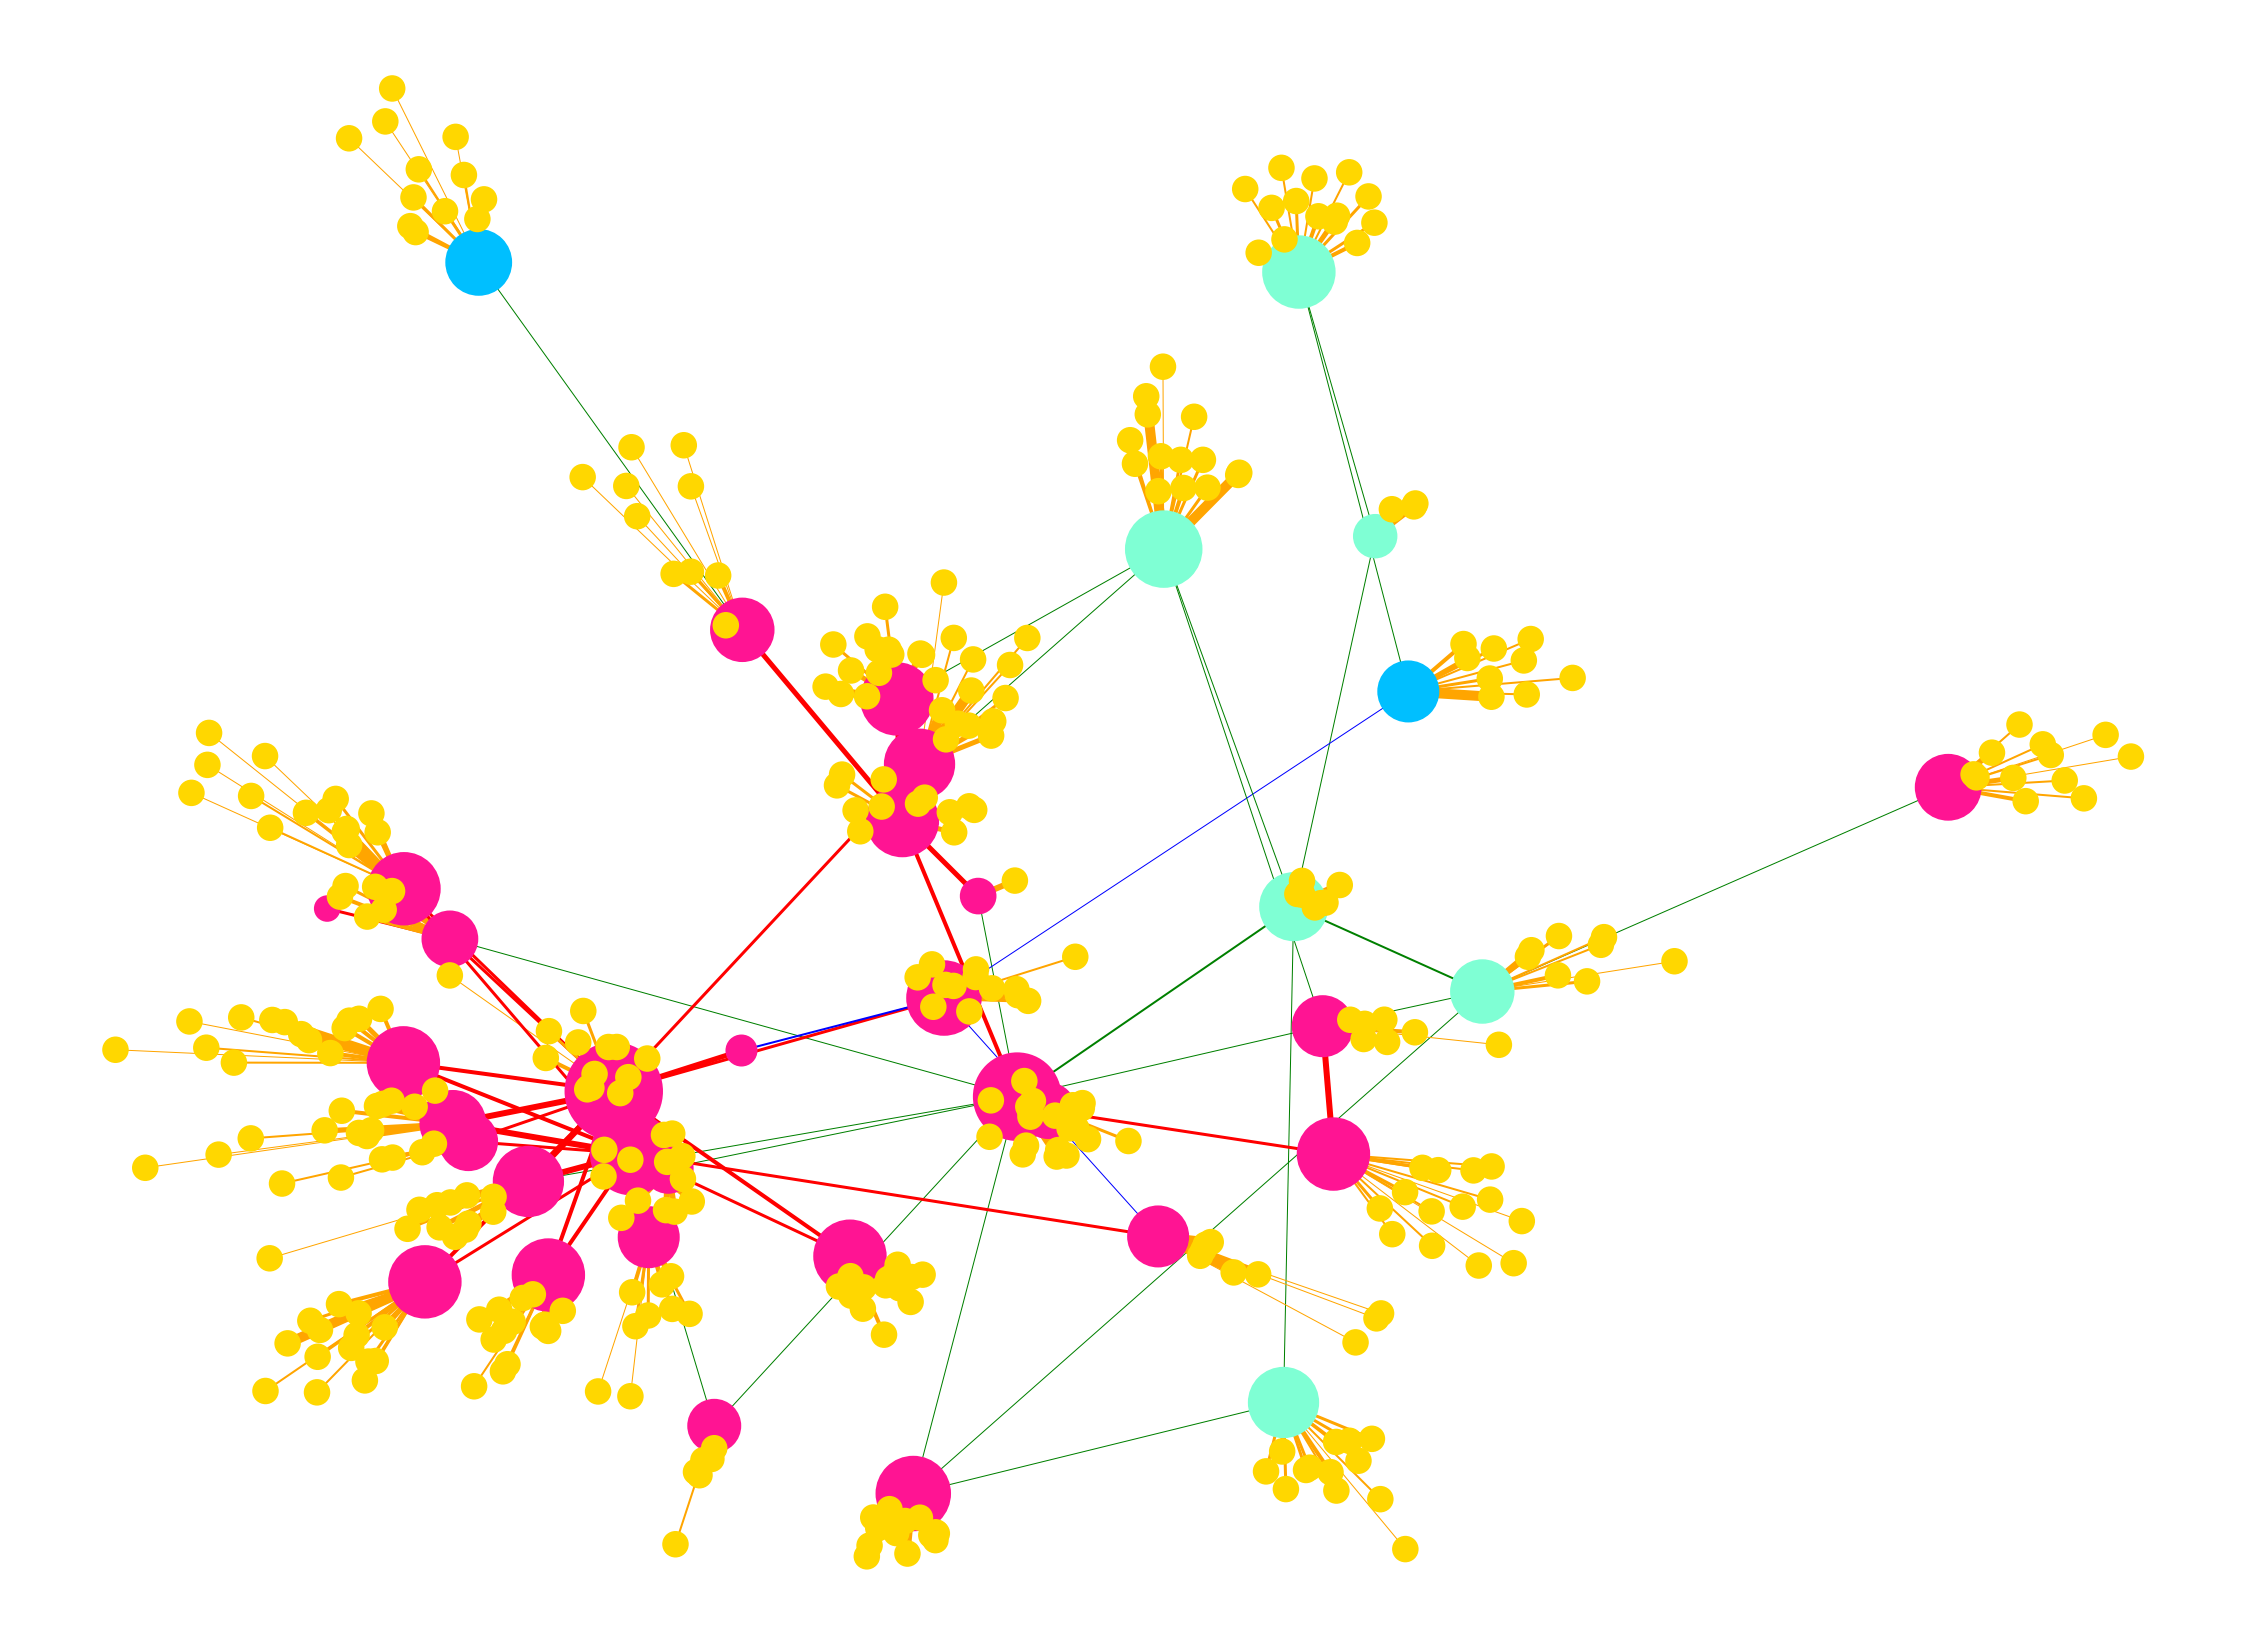

In [ ]:
plt.figure(figsize = (20,20))
pos = nx.spring_layout(week_graph_data)
node_color = [week_graph_data.node[node]['color'] for node in week_graph_data]
degrees = nx.degree(week_graph_data)
node_size = [(degrees[v] + 1) * 300.0 for v in week_graph_data.nodes()]
edge_color = [week_graph_data[u][v]['color'] for u,v in week_graph_data.edges()]
edge_weight = [week_graph_data[u][v]['weight'] for u,v in week_graph_data.edges()]
edge_discretization = discretization_weight(edge_weight)

plt.figure(figsize=(40,30))
nx.draw_networkx(week_graph_data, pos=pos, 
                 linewidths=2, cmap=plt.cm.PiYG, 
                 node_color=node_color, node_size=node_size, 
                 edge_color=edge_color, width=edge_discretization, with_labels=False, prog = 'dot')
plt.axis('off')

**Melihat Interaksi Pengguna dalam satuan Per-Bulan**

Membuat tambahan edge graph untuk memetakan jumlah postingan pengguna setiap bulannya

In [ ]:
user_graph_data = set(selected_graph.nodes())

month_graph_data = selected_graph.copy()

for i, user in users_df.iterrows():
    if user['username'] in user_graph_data:
        for i in range(0, 7):
            node_name = '{}_bulan{}'.format(user['username'],i+1)
            column = 'bulan{}'.format(i+1)
            month_interactions_data = final_month_tweets.loc[[user['username']], [column]]
            month_interactions_value = month_interactions_data[column][0]
            
            #check jika kedua user punya interaksi
            if month_interactions_value > 50:
                month_graph_data.add_node(node_name, weight=month_interactions_value, color='#9370DB')
                month_graph_data.add_edge(user['username'],node_name, weight=month_interactions_value, color='#BA55D3')

Menyalin graph data jumlah postingan

In [ ]:
month_interactions_graph_data_final = month_graph_data.copy()

Menyimpan data ke file graphml

In [ ]:
nx.write_graphml(month_interactions_graph_data_final, "../data/interractions/covid/month_interaction_graphml_{}-{}.graphml".format(date_start_convert, date_end_convert))  

membaca data file graph

In [ ]:
#month_interactions_graph_data_final = nx.read_graphml("../data/interractions/covid/month_interaction_graphml_{}-{}.graphml".format(date_start_convert, date_end_convert))  

Menampilkan ke dalam bentuk grapik

(-1.105981700232498,
 1.1048971243689492,
 -0.5608177354840915,
 0.9780901609419548)

<Figure size 1440x1440 with 0 Axes>

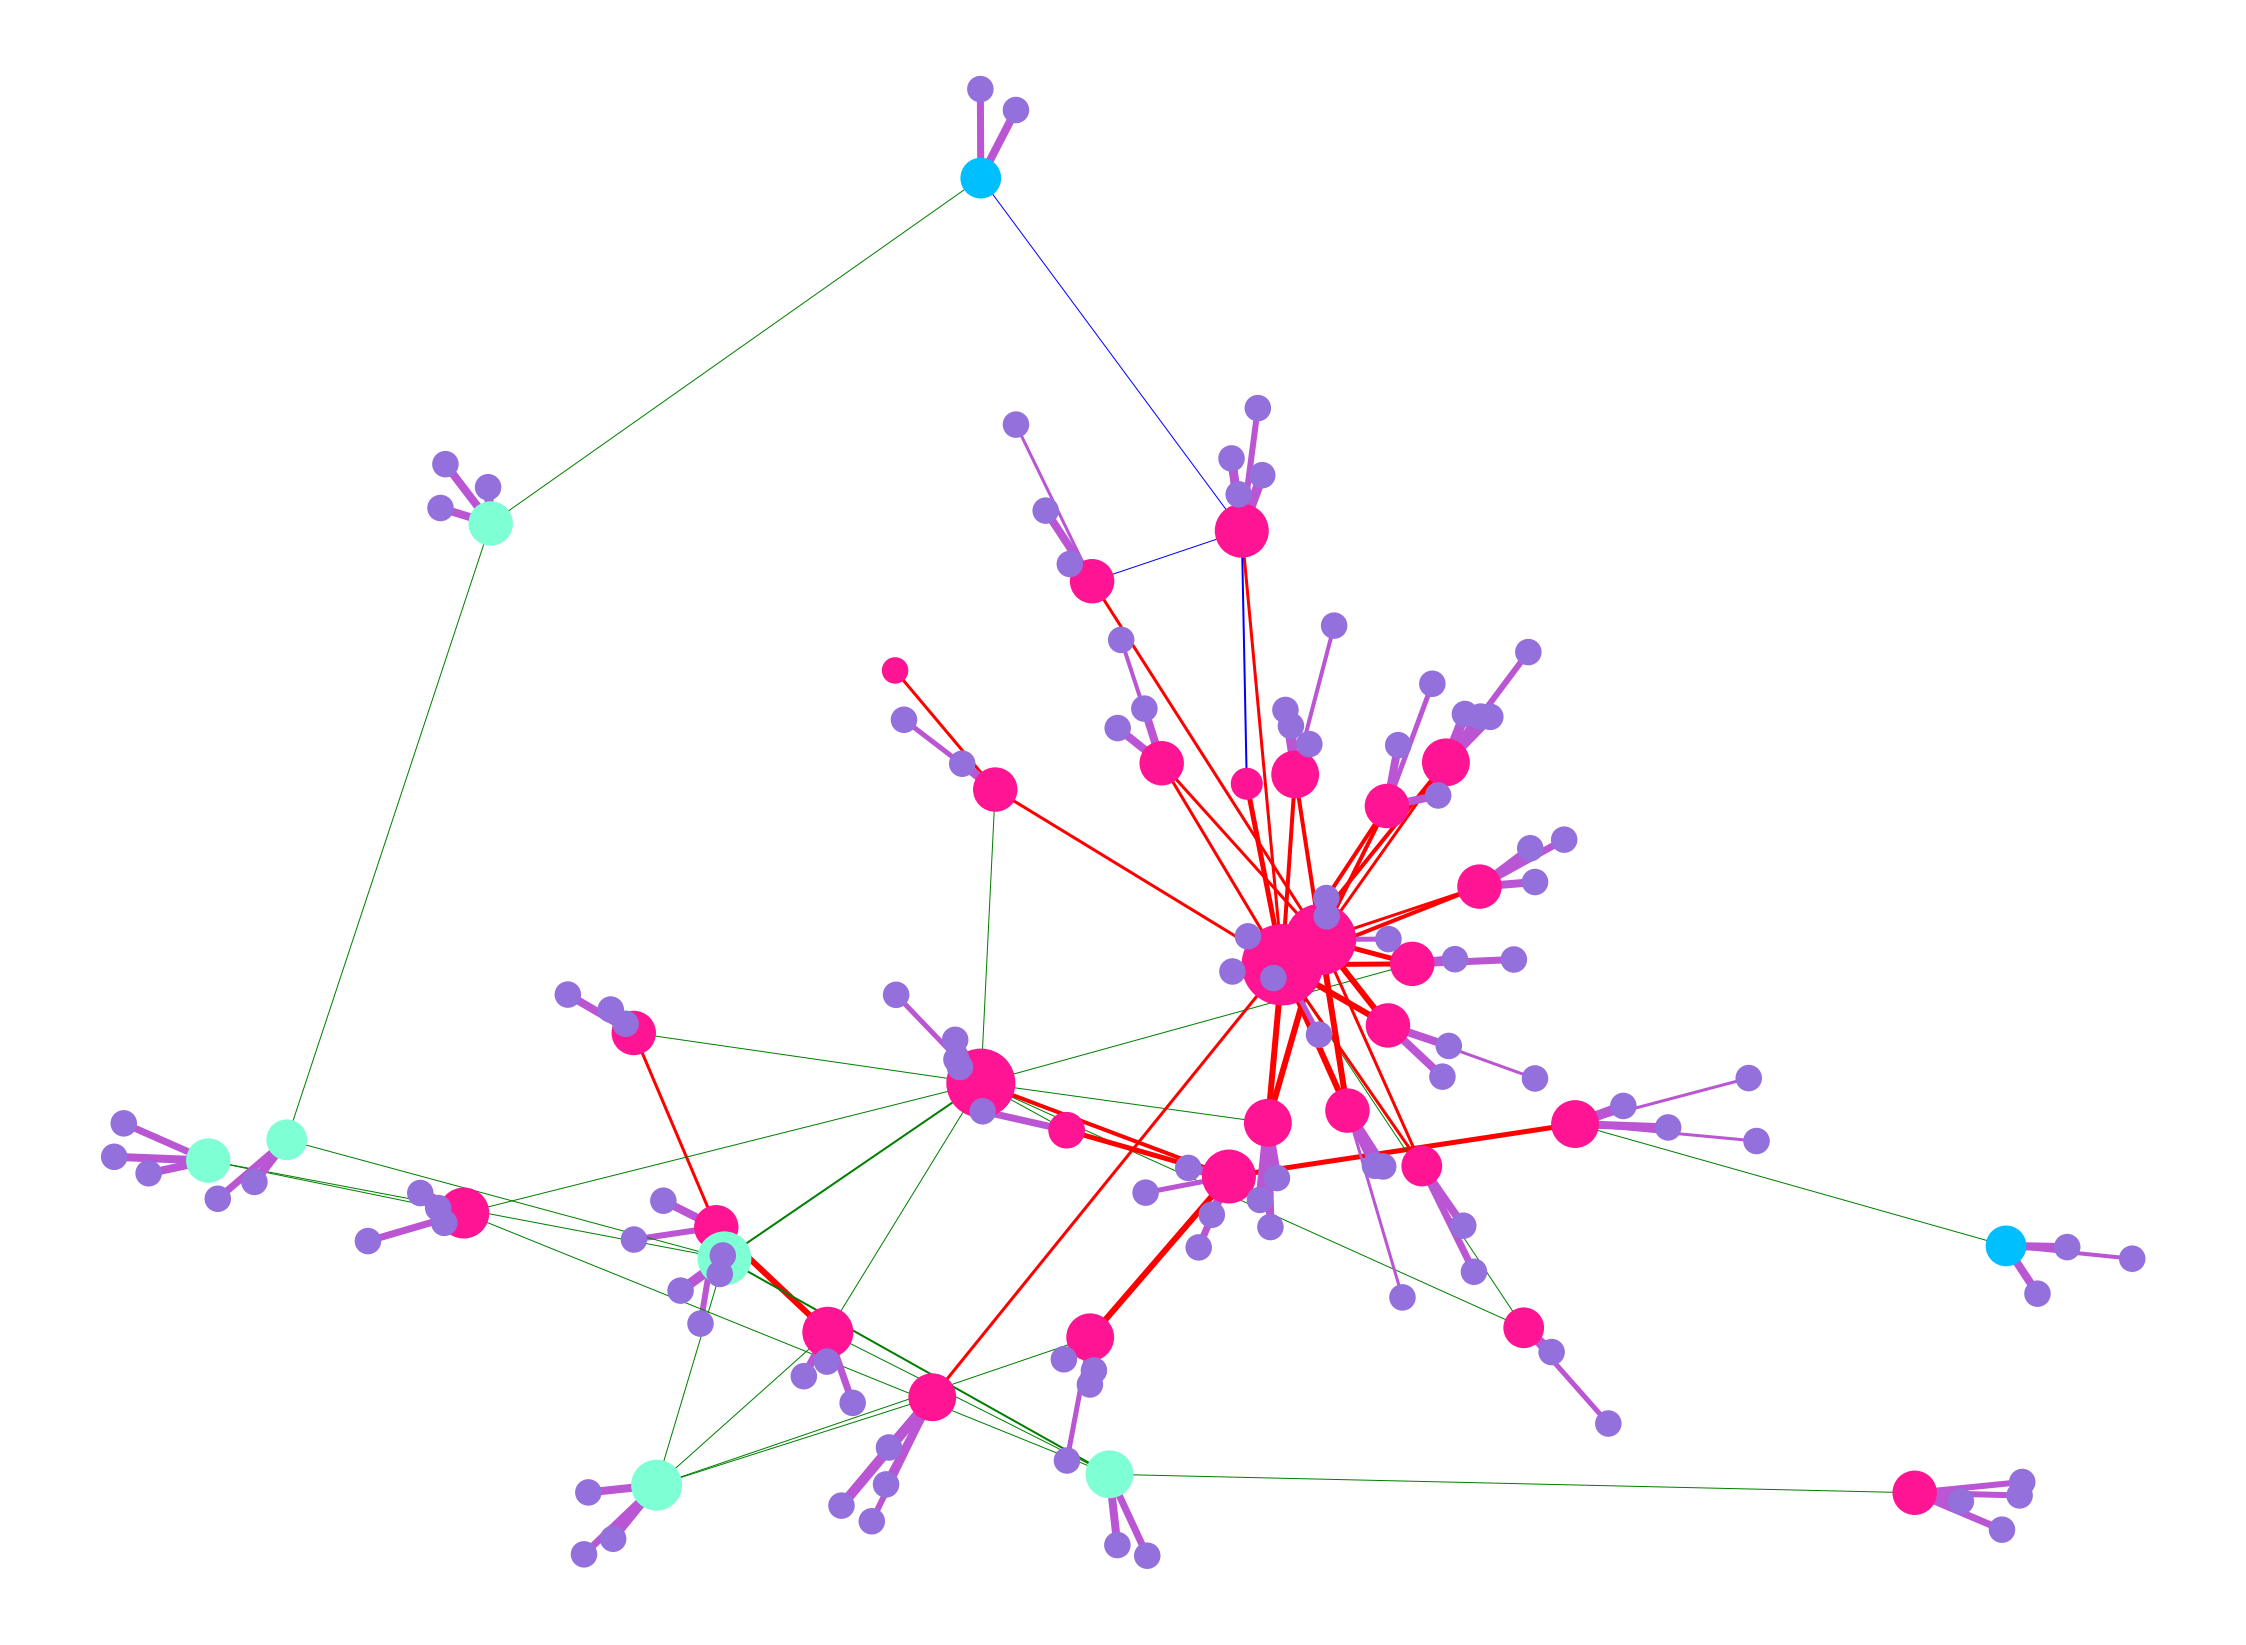

In [ ]:
plt.figure(figsize = (20,20))
pos = nx.spring_layout(month_graph_data)
node_color = [month_graph_data.node[node]['color'] for node in month_graph_data]
degrees = nx.degree(month_graph_data)
node_size = [(degrees[v] + 1) * 300.0 for v in month_graph_data.nodes()]
edge_color = [month_graph_data[u][v]['color'] for u,v in month_graph_data.edges()]
edge_weight = [month_graph_data[u][v]['weight'] for u,v in month_graph_data.edges()]
edge_discretization = discretization_weight(edge_weight)

plt.figure(figsize=(40,30))
nx.draw_networkx(month_graph_data, pos=pos, 
                 linewidths=2, cmap=plt.cm.PiYG, 
                 node_color=node_color, node_size=node_size, 
                 edge_color=edge_color, width=edge_discretization, with_labels=False, prog = 'dot')
plt.axis('off')